**This Project Made by Farid Hossain .**

#**Project Name:**

******************************************************

#**Covid-19: Comparative Data Analysis and Prediction for the World and Bangladesh.**

-----------------------

#**Introduction**

 The COVID-19 pandemic has had a profound impact on global public health, economies, and daily life. On January 30, 2020, the World Health Organization (WHO) declared the SARS-CoV-2 outbreak a Public Health Emergency of International Concern (PHEIC), emphasizing the urgent need for scientific research, data-driven decision-making, and predictive analytics. The crisis has spurred a global effort to develop effective diagnostic tools, vaccines, and therapeutics, with researchers worldwide leveraging data science and machine learning to understand and combat the virus.

This project, "Covid-19: Comparative Data Analysis and Prediction for the World and Bangladesh," aims to analyze COVID-19 trends across different regions, with a specific focus on Bangladesh. Using advanced data analysis techniques, including Predictive Data Modeling (PDM), classification algorithms, and deep learning frameworks like TensorFlow, this study seeks to identify patterns in infection rates, mortality, and recovery trends. The project integrates datasets from sources such as Kaggle, WHO, and national health organizations, including data from Bangladesh and China, to compare the outbreak's dynamics globally and locally.

By utilizing Python-based tools like pandas and Matplotlib, this research will provide insightful visualizations and predictive models that can aid policymakers, healthcare professionals, and researchers in preparing for future outbreaks. Open data sharing and transparent research methodologies will be emphasized to ensure that findings contribute meaningfully to the ongoing global fight against COVID-19.

# **Chapter 1**

**Importing all the Libraries that we need to do this project work**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
import os
import pandas as pd
import random
from tabulate import tabulate

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import logging


# Check library versions
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

# Suppress specific warnings (e.g., deprecation warnings) instead of all
warnings.filterwarnings('ignore', category=DeprecationWarning)

Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [ ]:
# Check library versions
print(f"Matplotlib version: {matplotlib.__version__}") # Access version from the main matplotlib module
print(f"Seaborn version: {sns.__version__}")

# Suppress specific warnings (e.g., deprecation warnings) instead of all
warnings.filterwarnings('ignore', category=DeprecationWarning)

Matplotlib version: 3.10.0
Seaborn version: 0.13.2


My Drive and data set Connection

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#**Chapter 1:1.1 Imported a dataset of Covid 19 where the data is stored upto 15th November, 2020 & 100 Countries Data list only show in here**

In [3]:
import os
import pandas as pd
from tabulate import tabulate

def analyze_covid_data():
    """
    Analyze COVID-19 data and display top 100 countries by confirmed cases.
    """
    # Define the file path (make sure this exactly matches your Drive mount)
    file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/" \
                "Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"

    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"? File not found: {file_path}")
        return None

    try:
        print("?? Loading COVID-19 dataset...")
        df = pd.read_csv(file_path)

        if df.empty:
            print("?? The dataset is empty.")
            return None

        # Required columns
        required_columns = ['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            print(f"? Missing required columns: {missing_columns}")
            return None

        # Convert to datetime
        df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')
        if df['ObservationDate'].isna().any():
            print("?? Some invalid dates found and will be excluded.")
            df = df.dropna(subset=['ObservationDate'])

        # Find the latest date
        latest_date = df['ObservationDate'].max()
        print(f"?? Latest observation date: {latest_date.date()}")

        # Filter to that date
        latest_df = df[df['ObservationDate'] == latest_date].copy()
        if latest_df.empty:
            print("?? No records for the latest date.")
            return None

        # Fill NaNs
        numeric_columns = ['Confirmed', 'Deaths', 'Recovered']
        latest_df[numeric_columns] = latest_df[numeric_columns].fillna(0)

        # Aggregate by country
        grouped = latest_df.groupby('Country/Region')[numeric_columns].sum().reset_index()
        grouped = grouped.sort_values('Confirmed', ascending=False)

        # Top 100
        top_100 = grouped.head(100).copy()
        top_100.insert(0, '#', range(1, len(top_100) + 1))

        # Summary stats
        total_conf = top_100['Confirmed'].sum()
        total_dea  = top_100['Deaths'].sum()
        total_rec  = top_100['Recovered'].sum()

        print("\n?? COVID-19 Summary (Top 100 Countries)")
        print("=" * 50)
        print(f"Total Confirmed : {total_conf:,.0f}")
        print(f"Total Deaths    : {total_dea:,.0f}")
        print(f"Total Recovered : {total_rec:,.0f}")
        print(f"CFR (deaths%)   : {total_dea/total_conf*100:.2f}%")
        print(f"Recovery Rate   : {total_rec/total_conf*100:.2f}%")
        print("=" * 50)

        # Format numbers for display
        for col in numeric_columns:
            top_100[col] = top_100[col].map("{:,.0f}".format)

        # Print table
        print(f"\n?? Top 100 Countries by Confirmed Cases (as of {latest_date.date()}):")
        print(tabulate(top_100, headers='keys', tablefmt='grid', showindex=False))

        return top_100

    except Exception as e:
        print(f"? An unexpected error occurred: {e}")
        return None

if __name__ == "__main__":
    analyze_covid_data()



?? Loading COVID-19 dataset...
?? Latest observation date: 2020-08-12

?? COVID-19 Summary (Top 100 Countries)
Total Confirmed : 20,479,258
Total Deaths    : 745,360
Total Recovered : 12,735,623
CFR (deaths%)   : 3.64%
Recovery Rate   : 62.19%

?? Top 100 Countries by Confirmed Cases (as of 2020-08-12):
+-----+------------------------+-------------+----------+-------------+
|   # | Country/Region         | Confirmed   | Deaths   | Recovered   |
+=====+========================+=============+==========+=============+
|   1 | US                     | 5,197,118   | 166,026  | 1,753,760   |
+-----+------------------------+-------------+----------+-------------+
|   2 | Brazil                 | 3,164,785   | 104,201  | 2,506,228   |
+-----+------------------------+-------------+----------+-------------+
|   3 | India                  | 2,396,637   | 47,033   | 1,695,982   |
+-----+------------------------+-------------+----------+-------------+
|   4 | Russia                 | 900,745     | 

**The counts for 'Confirmed' , 'Deaths' and 'Recovered' will be converted into int datatype for the simplicity of the usage**

In [4]:
# Define the file path directly
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "covid_19_data1.csv"
file_path = os.path.join(base_path, file_name)

try:
    # Load the dataset directly into the global df variable
    print("Loading COVID-19 dataset directly...")
    df = pd.read_csv(file_path)
    print("DataFrame loaded successfully.")

    # Optional: Basic data validation checks can be added here if needed
    if df.empty:
        print(" The dataset is empty.")

except FileNotFoundError:
    print(f"File '{file_path}' not found. Please make sure the file is in the correct directory.")
except pd.errors.EmptyDataError:
    print(" The CSV file is empty or corrupted.")
except pd.errors.ParserError as e:
    print(f" Error parsing CSV file: {e}")
except Exception as e:
    print(f" An unexpected error occurred: {e}")

# Now df is available in the global scope if loading was successful
if 'df' in globals() and df is not None:
    # Proceed with type conversions
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')
    # Check if 'Last Update' column exists before trying to convert
    if 'Last Update' in df.columns:
        df['Last Update'] = pd.to_datetime(df['Last Update'], errors='coerce')
    else:
        print("Warning: 'Last Update' column not found in DataFrame.")

    # Safely convert columns to int, coercing errors to NaN and filling with 0
    df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce').fillna(0).astype('int')
    df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce').fillna(0).astype('int')
    df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce').fillna(0).astype('int')

    print("\nData types converted for 'ObservationDate', 'Confirmed', 'Deaths', 'Recovered'.")
    print(df.info()) # Display info to confirm data types
else:
    print("\nDataFrame 'df' was not loaded. Cannot proceed with type conversions.")

Loading COVID-19 dataset directly...
DataFrame loaded successfully.

Data types converted for 'ObservationDate', 'Confirmed', 'Deaths', 'Recovered'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85638 entries, 0 to 85637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              85638 non-null  int64         
 1   ObservationDate  85638 non-null  datetime64[ns]
 2   Province/State   57338 non-null  object        
 3   Country/Region   85638 non-null  object        
 4   Last Update      167 non-null    datetime64[ns]
 5   Confirmed        85638 non-null  int64         
 6   Deaths           85638 non-null  int64         
 7   Recovered        85638 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 5.2+ MB
None


In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

**Since the final count of the cases is present on 12th August, 2020 we are trying to create a separate dataframe for the same**

In [6]:
# Get the most recent date
recent_date = df['ObservationDate'].max()

# Filter data for the most recent date
df_update = df[df['ObservationDate'] == recent_date]

# Display result
print(f"Most recent date: {recent_date.strftime('%Y-%m-%d')}")
print(f"Records found: {len(df_update)}")
df_update

Most recent date: 2020-08-12
Records found: 742


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
84896,84897,2020-08-12,NaN,Afghanistan,NaT,37345,1354,26694
84897,84898,2020-08-12,NaN,Albania,NaT,6817,208,3552
84898,84899,2020-08-12,NaN,Algeria,NaT,36699,1333,25627
84899,84900,2020-08-12,NaN,Andorra,NaT,977,53,855
84900,84901,2020-08-12,NaN,Angola,NaT,1762,80,577
...,...,...,...,...,...,...,...,...
85633,85634,2020-08-12,Zaporizhia Oblast,Ukraine,NaT,971,22,680
85634,85635,2020-08-12,Zeeland,Netherlands,NaT,950,69,0
85635,85636,2020-08-12,Zhejiang,Mainland China,NaT,1275,1,1268
85636,85637,2020-08-12,Zhytomyr Oblast,Ukraine,NaT,2215,48,1574


In [7]:
df_update.info

<bound method DataFrame.info of          SNo ObservationDate     Province/State  Country/Region Last Update  \
84896  84897      2020-08-12                NaN     Afghanistan         NaT   
84897  84898      2020-08-12                NaN         Albania         NaT   
84898  84899      2020-08-12                NaN         Algeria         NaT   
84899  84900      2020-08-12                NaN         Andorra         NaT   
84900  84901      2020-08-12                NaN          Angola         NaT   
...      ...             ...                ...             ...         ...   
85633  85634      2020-08-12  Zaporizhia Oblast         Ukraine         NaT   
85634  85635      2020-08-12            Zeeland     Netherlands         NaT   
85635  85636      2020-08-12           Zhejiang  Mainland China         NaT   
85636  85637      2020-08-12    Zhytomyr Oblast         Ukraine         NaT   
85637  85638      2020-08-12       Zuid-Holland     Netherlands         NaT   

       Confirmed  Deaths  Recovered  
84896      37345    1354      26694  
84897       6817     208       3552  
84898      36699    1333      25627  
84899        977      53        855  
84900       1762      80        577  
...          ...     ...        ...  
85633        971      22        680  
85634        950      69          0  
85635       1275       1       1268  
85636       2215      48       1574  
85637      15765    1314          0  

[742 rows x 8 columns]>

# **1.2 Covid 19  total confirmed, deaths, recovered total and percentage**


COVID-19 Cases Summary:
 Category        Count  Percentage
Confirmed 1127440419.0        64.2
   Deaths   54453892.0         3.1
Recovered  574270806.0        32.7


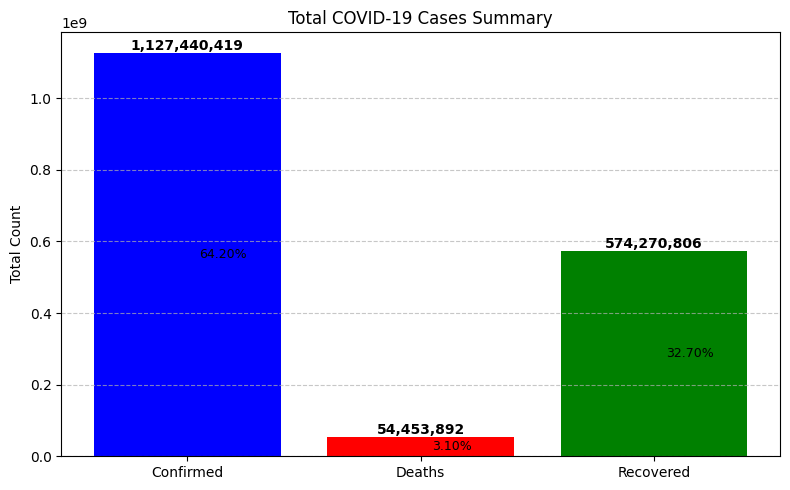

In [8]:
# File path to dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"

# Load the dataset
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    print("Current working directory:", os.getcwd())
    exit()

# Check for required columns
required_cols = {'Confirmed', 'Deaths', 'Recovered'}
if not required_cols.issubset(df.columns):
    missing = required_cols - set(df.columns)
    print(f"Missing required columns: {missing}")
    exit()

# Compute totals and percentages
categories = ['Confirmed', 'Deaths', 'Recovered']
totals = df[categories].sum()
percentages = (totals / totals.sum() * 100).round(2)

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Category': categories,
    'Count': totals.values,
    'Percentage': percentages.values
})

# Print summary table
print("\nCOVID-19 Cases Summary:")
print(summary_df.to_string(index=False))

# Plot bar chart
plt.figure(figsize=(8, 5))
colors = ['blue', 'red', 'green']
bars = plt.bar(summary_df['Category'], summary_df['Count'], color=colors)

# Add count and percentage labels
for bar, pct in zip(bars, summary_df['Percentage']):
    height = bar.get_height()
    # Count label
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    # Percentage label
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.05, height * 0.5,
             f'{pct:.2f}%', ha='left', va='center', fontsize=9)

plt.title('Total COVID-19 Cases Summary')
plt.ylabel('Total Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **1.3  Model Performance Comparison(COVID-19: Actual vs Predicted and Evaluation Metrics -in the world all cases).LMST MODEL**

/tmp/ipython-input-9-4022703519.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # handle missing values
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



?? Model Evaluation Metrics:
------------------------------

?? Training and evaluating model for: Confirmed
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
  RMSE: 744387.09
  MAE:  661323.21
  R2:   0.9272

?? Training and evaluating model for: Deaths


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
  RMSE: 43343.62
  MAE:  40277.25
  R2:   0.5499

?? Training and evaluating model for: Recovered


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step
  RMSE: 515796.86
  MAE:  434794.19
  R2:   0.9314


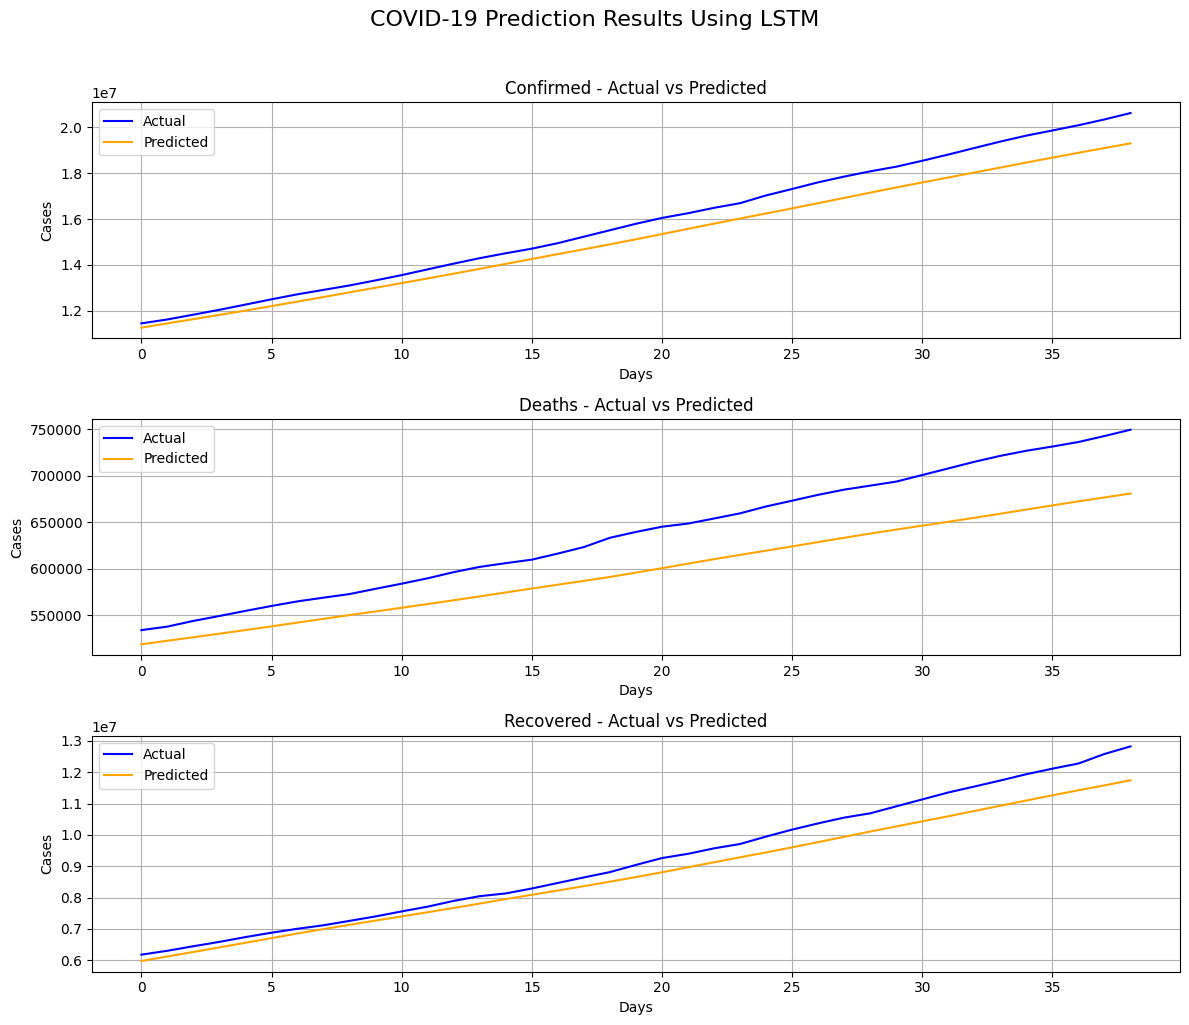

In [9]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ================================================================
# ? 1. Ensure Full Reproducibility (Determinism)
# ================================================================
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"  # Optional: force CPU for full reproducibility
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# ================================================================
# ? 2. Load and Preprocess the Data
# ================================================================
def load_data(filepath):
    df = pd.read_csv(filepath)
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
    df = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()
    df.fillna(method='ffill', inplace=True)  # handle missing values
    return df

# ================================================================
# ? 3. Prepare Data Sequences for LSTM
# ================================================================
def create_sequences(data, steps=10):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:i + steps])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

# ================================================================
# ? 4. Build LSTM Model
# ================================================================
def build_lstm(input_shape):
    model = Sequential([
        LSTM(50, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# ================================================================
# ? 5. Train and Evaluate Model
# ================================================================
def train_and_evaluate(daily_data, target, steps=10, epochs=30, batch_size=8):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(daily_data[[target]])
    X, y = create_sequences(scaled, steps)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    X_train = X_train.reshape((X_train.shape[0], steps, 1))
    X_test = X_test.reshape((X_test.shape[0], steps, 1))

    model = build_lstm((steps, 1))
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    y_pred_scaled = model.predict(X_test).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_orig = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)),
        'MAE': mean_absolute_error(y_test_orig, y_pred_orig),
        'R2': r2_score(y_test_orig, y_pred_orig)
    }

    return y_test_orig, y_pred_orig, metrics

# ================================================================
# ? 6. Plot Actual vs Predicted Results (Updated with labels)
# ================================================================
def plot_results(results):
    plt.figure(figsize=(12, 10))
    for i, (target, (y_true, y_pred, _)) in enumerate(results.items()):
        plt.subplot(3, 1, i + 1)
        plt.plot(y_true, label='Actual', color='blue')
        plt.plot(y_pred, label='Predicted', color='orange')
        plt.title(f"{target} - Actual vs Predicted", fontsize=12)
        plt.xlabel("Days", fontsize=10)
        plt.ylabel("Cases", fontsize=10)
        plt.legend()
        plt.grid(True)

    plt.suptitle("COVID-19 Prediction Results Using LSTM", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# ================================================================
# ? 7. Run All
# ================================================================
if __name__ == "__main__":
    filepath = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
    daily_data = load_data(filepath)

    results = {}
    print("\n?? Model Evaluation Metrics:\n" + "-" * 30)
    for target in ['Confirmed', 'Deaths', 'Recovered']:
        print(f"\n?? Training and evaluating model for: {target}")
        y_true, y_pred, metrics = train_and_evaluate(daily_data, target)
        results[target] = (y_true, y_pred, metrics)
        print(f"  RMSE: {metrics['RMSE']:.2f}")
        print(f"  MAE:  {metrics['MAE']:.2f}")
        print(f"  R2:   {metrics['R2']:.4f}")

    plot_results(results)




# **1.4 COVID-19: Actual vs XGBoost Predicted in the world, All cases.**

? Data loaded successfully. Shape: (204, 3)

?? XGBoost Model Evaluation for COVID-19 Prediction

?? Training model for Confirmed...

?? Confirmed - Evaluation Metrics:
   RMSE: 5,376,167.70
   MAE:  4,613,783.03
   R:   -2.7950

?? Training model for Deaths...

?? Deaths - Evaluation Metrics:
   RMSE: 126,369.62
   MAE:  108,608.55
   R:   -2.8264

?? Training model for Recovered...

?? Recovered - Evaluation Metrics:
   RMSE: 3,720,145.64
   MAE:  3,156,335.55
   R:   -2.5696


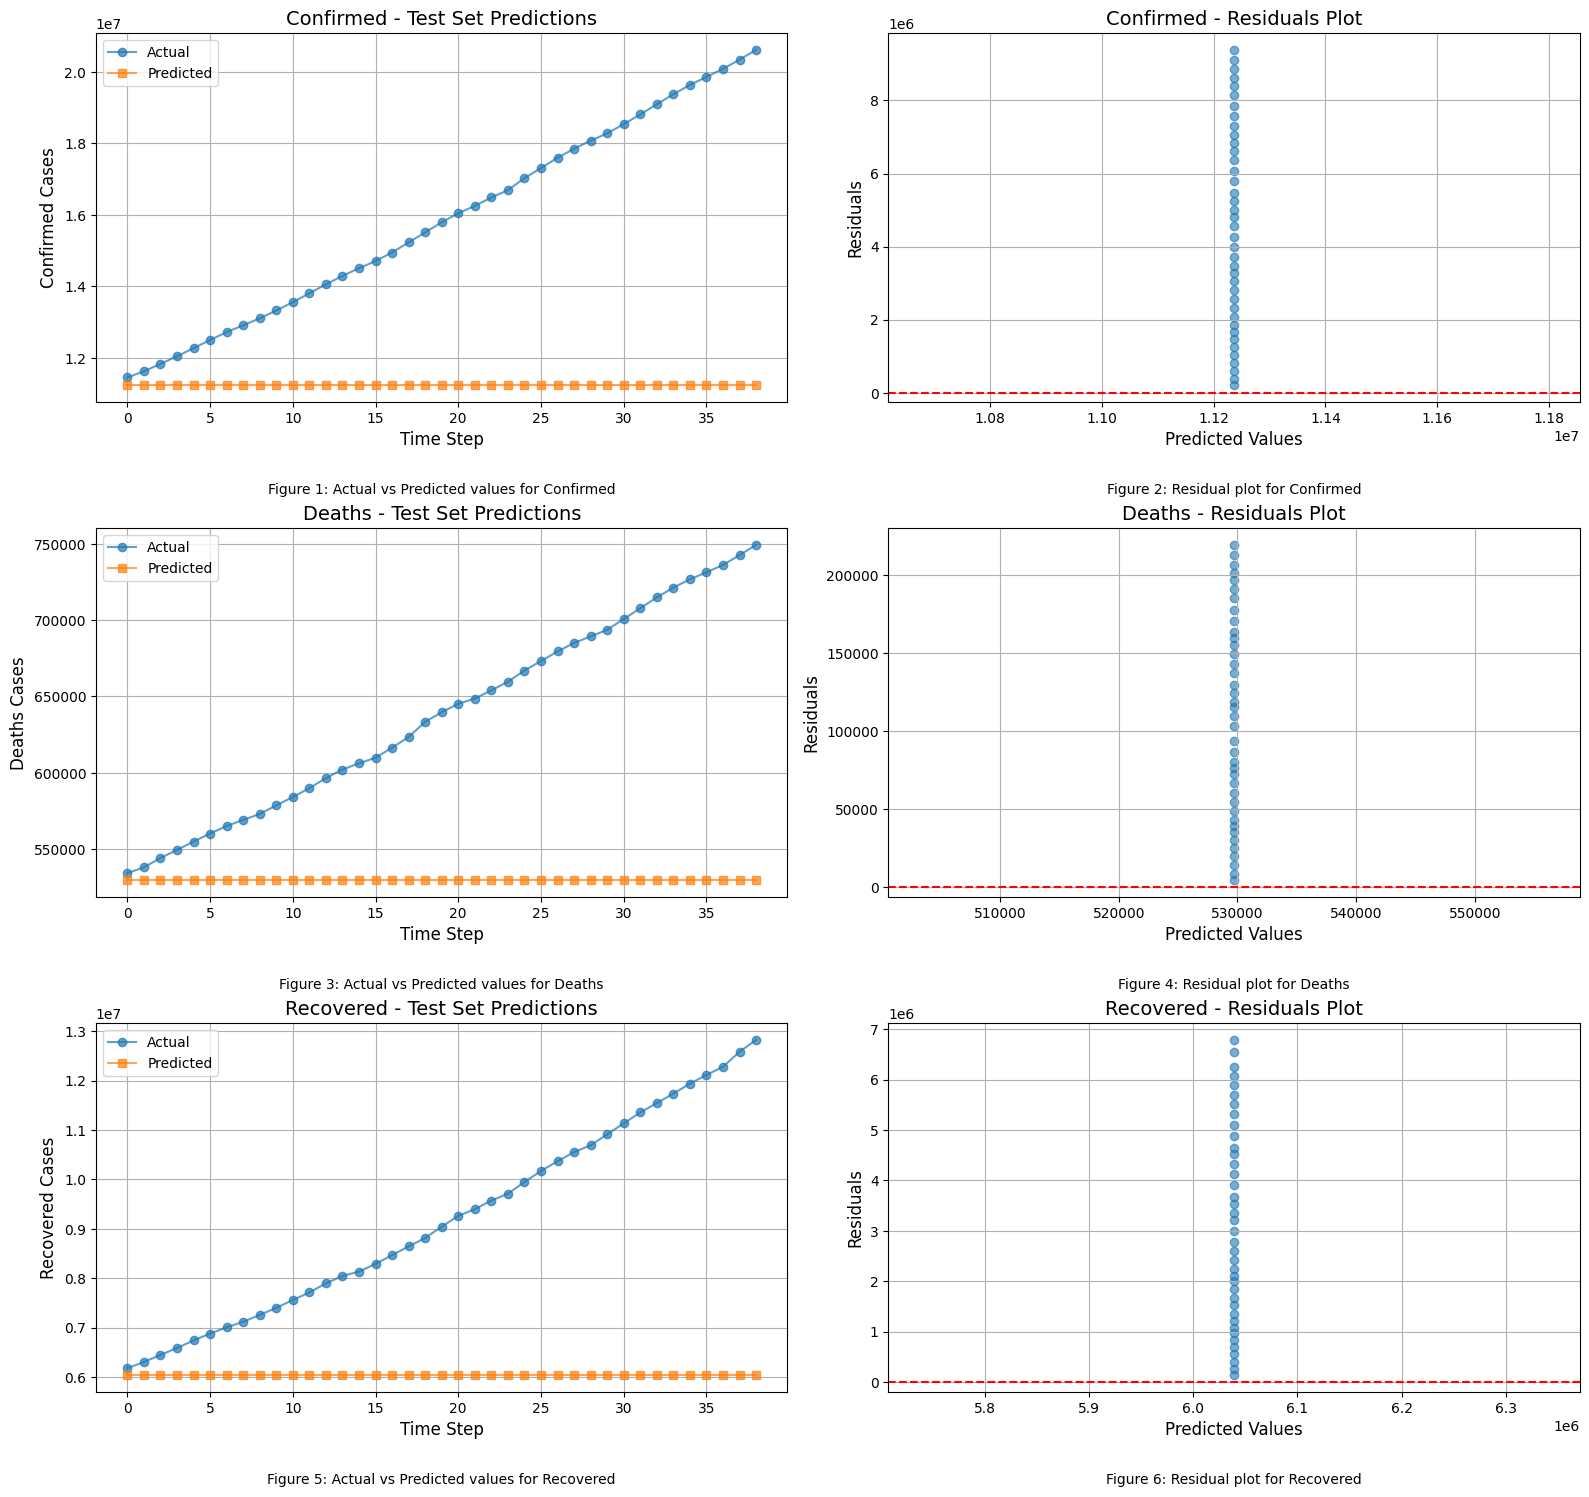

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Set random seed for reproducibility
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

# Load and preprocess data
def load_data(filepath):
    """Load and aggregate COVID-19 data by date"""
    df = pd.read_csv(filepath)
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
    return df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Create sequences for time series
def create_sequences(data, steps=10):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:i+steps])
        y.append(data[i+steps])
    return np.array(X), np.array(y)

# Train XGBoost model
def train_predict_model(data, target_col, steps=10):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[[target_col]]).flatten()

    X, y = create_sequences(scaled_data, steps)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False, random_state=42
    )

    model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        random_state=42,
        verbosity=0
    )

    model.fit(X_train.reshape(X_train.shape[0], steps), y_train)

    train_pred = model.predict(X_train.reshape(X_train.shape[0], steps))
    test_pred = model.predict(X_test.reshape(X_test.shape[0], steps))

    # Inverse transform
    train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1)).flatten()
    test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1)).flatten()
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    return {
        'train_true': y_train_orig,
        'train_pred': train_pred,
        'test_true': y_test_orig,
        'test_pred': test_pred,
        'model': model,
        'scaler': scaler
    }

# Evaluation metrics
def evaluate_model(true_values, predictions):
    return {
        'RMSE': np.sqrt(mean_squared_error(true_values, predictions)),
        'MAE': mean_absolute_error(true_values, predictions),
        'R': r2_score(true_values, predictions)
    }

# Plot predictions with labels and captions
def plot_results(results_dict):
    fig, axes = plt.subplots(len(results_dict), 2, figsize=(16, 5*len(results_dict)))
    if len(results_dict) == 1:
        axes = axes.reshape(1, -1)

    for i, (target, results) in enumerate(results_dict.items()):
        # Plot actual vs predicted
        axes[i, 0].plot(results['test_true'], 'o-', label='Actual', alpha=0.7)
        axes[i, 0].plot(results['test_pred'], 's-', label='Predicted', alpha=0.7)
        axes[i, 0].set_title(f"{target} - Test Set Predictions", fontsize=14)
        axes[i, 0].set_xlabel("Time Step", fontsize=12)
        axes[i, 0].set_ylabel(f"{target} Cases", fontsize=12)
        axes[i, 0].legend()
        axes[i, 0].grid(True)

        # Caption
        axes[i, 0].text(0.5, -0.25, f"Figure {2*i+1}: Actual vs Predicted values for {target}",
                       transform=axes[i, 0].transAxes, ha='center', fontsize=10)

        # Residuals
        residuals = results['test_true'] - results['test_pred']
        axes[i, 1].scatter(results['test_pred'], residuals, alpha=0.6)
        axes[i, 1].axhline(y=0, color='r', linestyle='--')
        axes[i, 1].set_title(f"{target} - Residuals Plot", fontsize=14)
        axes[i, 1].set_xlabel("Predicted Values", fontsize=12)
        axes[i, 1].set_ylabel("Residuals", fontsize=12)
        axes[i, 1].grid(True)

        # Caption
        axes[i, 1].text(0.5, -0.25, f"Figure {2*i+2}: Residual plot for {target}",
                       transform=axes[i, 1].transAxes, ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Update this to your actual file path
    data_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"

    try:
        # Load data
        daily_data = load_data(data_path)
        print(f"? Data loaded successfully. Shape: {daily_data.shape}")

        # Targets to model
        targets = ['Confirmed', 'Deaths', 'Recovered']
        all_results = {}

        print("\n" + "="*60)
        print("?? XGBoost Model Evaluation for COVID-19 Prediction")
        print("="*60)

        for target in targets:
            print(f"\n?? Training model for {target}...")
            results = train_predict_model(daily_data, target)
            all_results[target] = results

            metrics = evaluate_model(results['test_true'], results['test_pred'])
            print(f"\n?? {target} - Evaluation Metrics:")
            print(f"   RMSE: {metrics['RMSE']:,.2f}")
            print(f"   MAE:  {metrics['MAE']:,.2f}")
            print(f"   R:   {metrics['R']:.4f}")

        # Plot results
        plot_results(all_results)

    except FileNotFoundError:
        print(f"? Error: Could not find the data file at {data_path}")
        print("??  Please check the file path.")
    except Exception as e:
        print(f"? An error occurred: {str(e)}")



#**Chapter 2 : China - The First Epicentre of the pandemic**

#**2.1 Since China is the first epicentre of this pandemic situation, we are checking for provinces within China to detect the spread out of the virus**

In [ ]:
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)




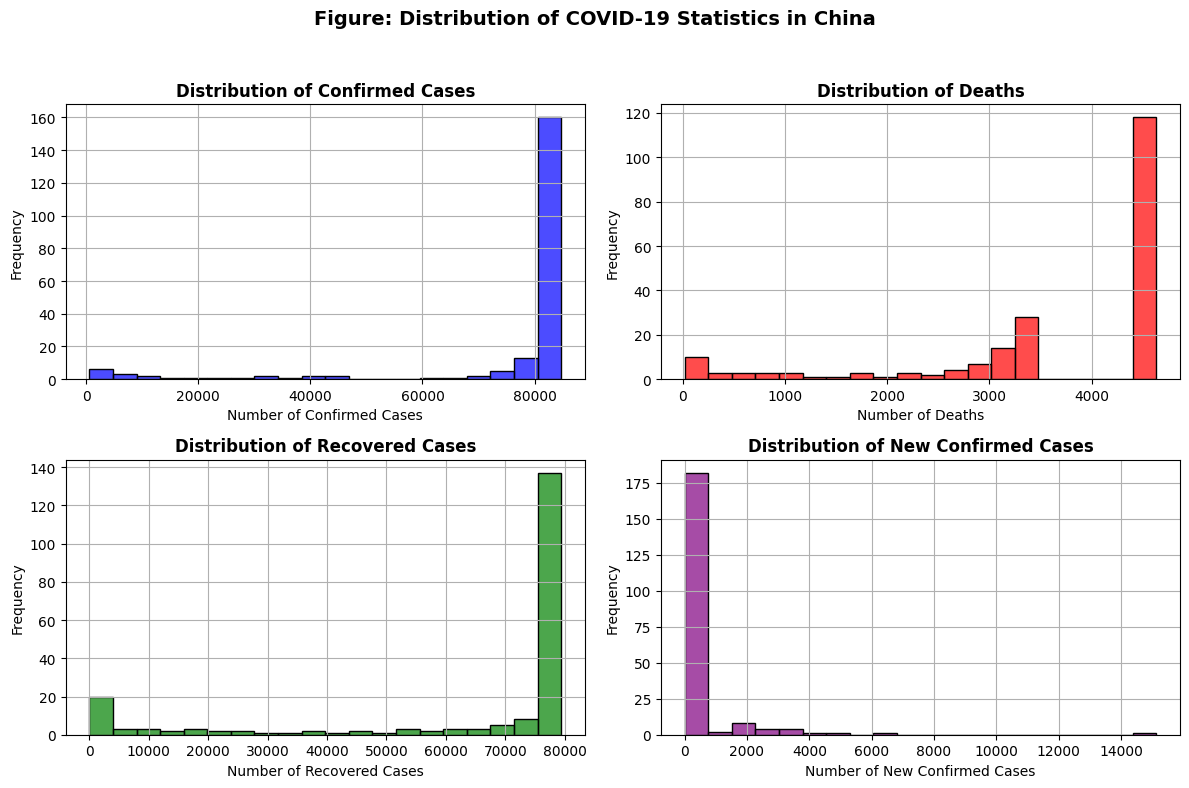

Summary: COVID-19 Situation in China (as of 2020-08-12)
Total Confirmed Cases: 84,756
Total Deaths:          4,634
Total Recovered:       79,398
New Confirmed (last day): 25


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and clean data
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Country/Region'] = df['Country/Region'].str.strip().str.lower()

# Filter for China
china = df[df['Country/Region'].str.contains('china', case=False, na=False)]
if china.empty:
    raise ValueError("No China data found!")

# Daily aggregation
daily = china.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
daily['New_Confirmed'] = daily['Confirmed'].diff().fillna(0).clip(lower=0)

# Plot distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
data = [daily['Confirmed'], daily['Deaths'], daily['Recovered'], daily['New_Confirmed']]
titles = ['Confirmed Cases', 'Deaths', 'Recovered Cases', 'New Confirmed Cases']
colors = ['blue', 'red', 'green', 'purple']

for ax, d, title, color in zip(axs.flat, data, titles, colors):
    sns.histplot(d, bins=20, color=color, ax=ax, alpha=0.7)
    ax.set_title(f"Distribution of {title}", fontsize=12, fontweight='bold')
    ax.set_xlabel(f"Number of {title}", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.grid(True)

fig.suptitle("Figure: Distribution of COVID-19 Statistics in China", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include suptitle
plt.show()

# Summary
latest = daily.iloc[-1]
print("="*60)
print(f"Summary: COVID-19 Situation in China (as of {latest['ObservationDate'].date()})")
print("="*60)
print(f"Total Confirmed Cases: {latest['Confirmed']:,.0f}")
print(f"Total Deaths:          {latest['Deaths']:,.0f}")
print(f"Total Recovered:       {latest['Recovered']:,.0f}")
print(f"New Confirmed (last day): {latest['New_Confirmed']:,.0f}")


# **2.2 ARIMA Forecast for Confirmed, Deaths, and Recovered Cases in China And  ARIMA Model Evaluation Metrics (last 30 days backtest)**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

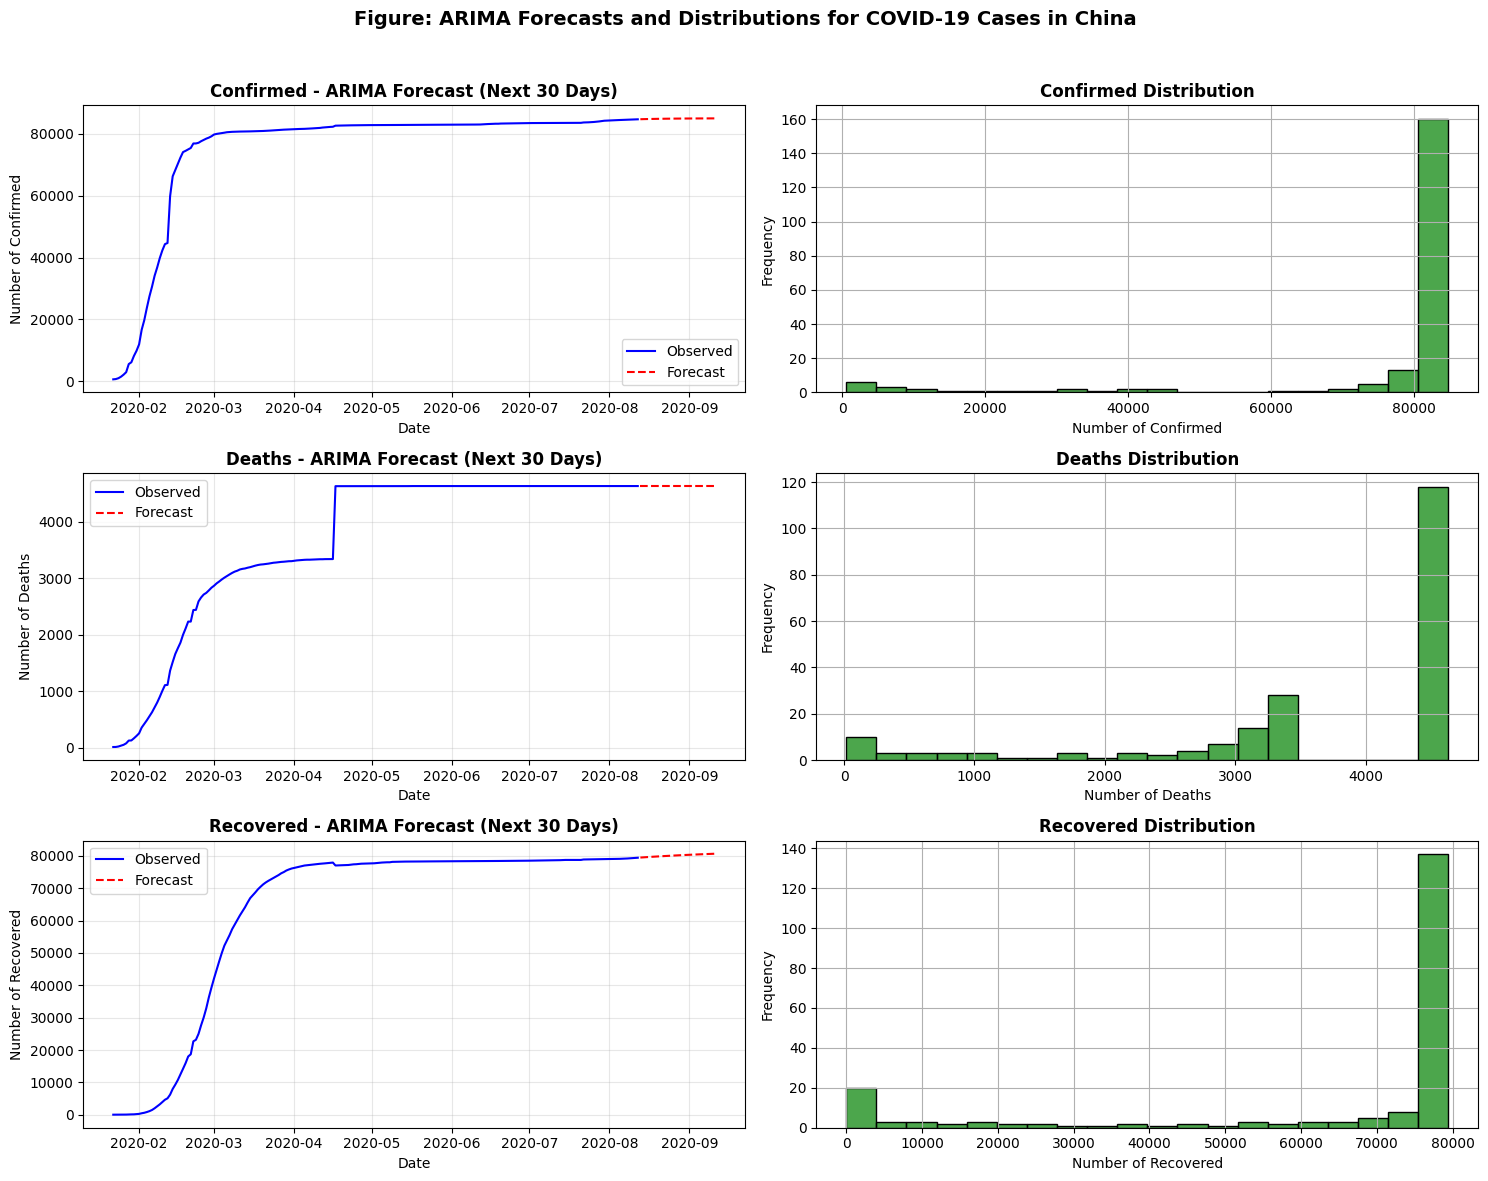


ARIMA Model Evaluation Metrics (Last 30 Days):
            RMSE    MAE R2 Score
Confirmed  30.75  19.12   0.9947
Deaths      0.00   0.00   1.0000
Recovered  31.64  17.41   0.9736


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare data
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Detect relevant column names dynamically
cols = {
    k: next(col for col in df.columns if k in col.lower())
    for k in ['country', 'date', 'confirmed', 'death', 'recover']
}

# Filter data for China
df[cols['country']] = df[cols['country']].str.strip().str.lower()
china = df[df[cols['country']].str.contains("china", na=False)].copy()
china[cols['date']] = pd.to_datetime(china[cols['date']])

# Daily aggregation
daily = china.groupby(cols['date'])[[cols['confirmed'], cols['death'], cols['recover']]].sum()
daily.columns = ['Confirmed', 'Deaths', 'Recovered']

# ARIMA forecasting parameters
forecast_days = 30
metrics = pd.DataFrame(columns=["RMSE", "MAE", "R2 Score"])

# Setup plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, case in enumerate(['Confirmed', 'Deaths', 'Recovered']):
    series = daily[case]

    # Fit ARIMA model
    model = ARIMA(series, order=(5, 1, 0)).fit()

    # Forecast future values
    forecast = model.forecast(steps=forecast_days)
    forecast_dates = pd.date_range(series.index[-1] + pd.Timedelta(days=1), periods=forecast_days)

    # Backtest metrics (last 30 days)
    test_size = min(30, len(series) - 1)
    y_true = series[-test_size:]
    y_pred = model.predict(start=len(series) - test_size, end=len(series) - 1)

    # Save metrics
    metrics.loc[case] = [
        f"{np.sqrt(mean_squared_error(y_true, y_pred)):.2f}",
        f"{mean_absolute_error(y_true, y_pred):.2f}",
        f"{r2_score(y_true, y_pred):.4f}"
    ]

    # Forecast plot
    axes[i, 0].plot(series.index, series, 'b-', label='Observed')
    axes[i, 0].plot(forecast_dates, forecast, 'r--', label='Forecast')
    axes[i, 0].set_title(f"{case} - ARIMA Forecast (Next {forecast_days} Days)", fontsize=12, fontweight='bold')
    axes[i, 0].set_xlabel("Date", fontsize=10)
    axes[i, 0].set_ylabel(f"Number of {case}", fontsize=10)
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)

    # Distribution plot
    sns.histplot(series, bins=20, ax=axes[i, 1], color='green', alpha=0.7)
    axes[i, 1].set_title(f"{case} Distribution", fontsize=12, fontweight='bold')
    axes[i, 1].set_xlabel(f"Number of {case}", fontsize=10)
    axes[i, 1].set_ylabel("Frequency", fontsize=10)
    axes[i, 1].grid(True)

# Add figure caption
fig.suptitle("Figure: ARIMA Forecasts and Distributions for COVID-19 Cases in China", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Display evaluation metrics
print("\nARIMA Model Evaluation Metrics (Last 30 Days):")
print(metrics)



--------------

---------------

# **Chapter 3 These are detailed parts of the  world.**

## **3.1. Finding out How many countries were affected by Covid-19**

In [ ]:
# Load dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Get unique countries
affected_countries = df['Country/Region'].nunique()

# Print the result
print(f"Total number of countries affected by COVID-19: {affected_countries}")



Total number of countries affected by COVID-19: 223


# **3.2- 20 number of countries affected Show In a Plot**

🌍 Total number of countries affected by COVID-19: 223


/tmp/ipython-input-23-1592981277.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


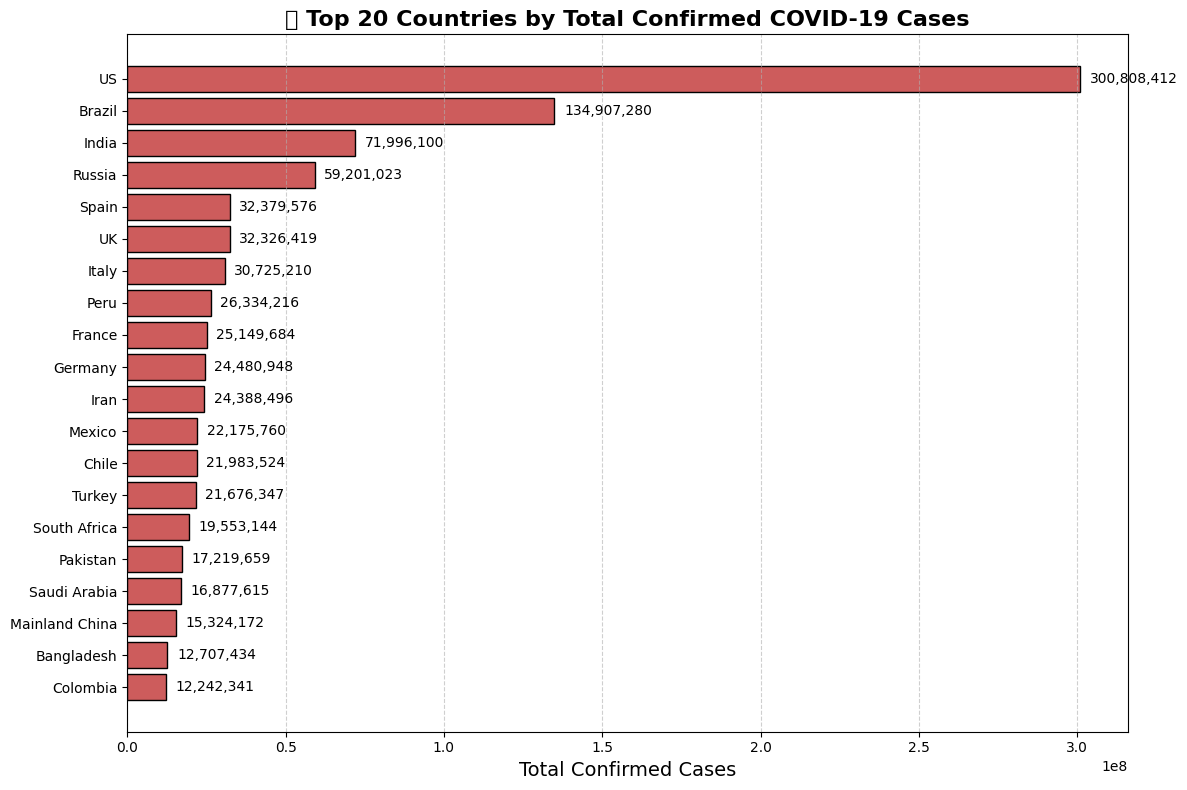

In [ ]:
# === Load dataset ===
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# === Group by country and sum confirmed cases ===
confirmed_by_country = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)

# === Count unique affected countries ===
affected_countries = confirmed_by_country.shape[0]
print(f"🌍 Total number of countries affected by COVID-19: {affected_countries}")

# === Plot top 20 countries only for clarity ===
top_countries = confirmed_by_country.head(20)
countries = top_countries.index
cases = top_countries.values

# === Horizontal bar plot ===
plt.figure(figsize=(12, 8))
bars = plt.barh(countries, cases, color='indianred', edgecolor='black')

# === Annotate values on bars ===
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(cases) * 0.01, bar.get_y() + bar.get_height()/2,
             f"{int(width):,}", va='center', fontsize=10)

# === Style and labels ===
plt.title("📊 Top 20 Countries by Total Confirmed COVID-19 Cases", fontsize=16, fontweight='bold')
plt.xlabel("Total Confirmed Cases", fontsize=14)
plt.gca().invert_yaxis()  # Highest at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


***********

## **3.3. Percentage of confirmed cases per country through the Pie-chart**

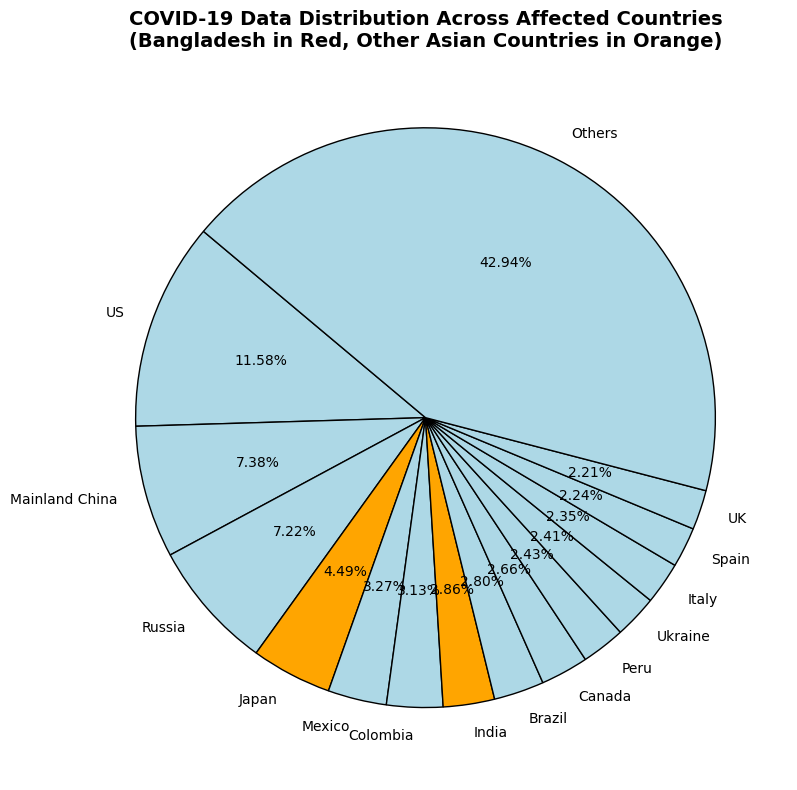

In [ ]:
# === Load dataset ===
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# === Count occurrences of each country ===
country_counts = df['Country/Region'].value_counts()

# === List of Asian countries ===
asian_countries = [
    "Bangladesh", "India", "China", "Pakistan", "Japan", "South Korea", "Indonesia",
    "Malaysia", "Thailand", "Vietnam", "Philippines", "Sri Lanka", "Nepal", "Myanmar",
    "Afghanistan", "Iran", "Iraq", "Saudi Arabia", "UAE", "Turkey", "Kazakhstan"
]

# === Keep top 14, group the rest as 'Others' ===
top_n = 14
top_countries = country_counts.head(top_n)
others = pd.Series({'Others': country_counts[top_n:].sum()})
country_counts_final = pd.concat([top_countries, others])

# === Assign colors ===
colors = []
for country in country_counts_final.index:
    if country == "Bangladesh":
        colors.append("red")
    elif country in asian_countries:
        colors.append("orange")
    else:
        colors.append("lightblue")

# === Plot the pie chart ===
plt.figure(figsize=(12, 8))
plt.pie(
    country_counts_final,
    labels=country_counts_final.index,
    autopct='%1.2f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# === Title ===
plt.title(
    "COVID-19 Data Distribution Across Affected Countries\n"
    "(Bangladesh in Red, Other Asian Countries in Orange)",
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


**Approximately 11.6% of the total confirmed cases of the world is found at United States of America**

****************************
************************

*****************************


*************************

#**Chapter-4-BANGLADESH COVID 19 ANALYSIS**

# **4.1 Current Situation And Analysis in  BANGLADESH**

 Available Columns: ['Date', 'Confirmed/Day', 'TotalConfirmed', 'Deaths/Day', 'DeathsTotal', 'Recovery/Day', 'TotalRecovered', 'Tests/Day', 'TotalTests']


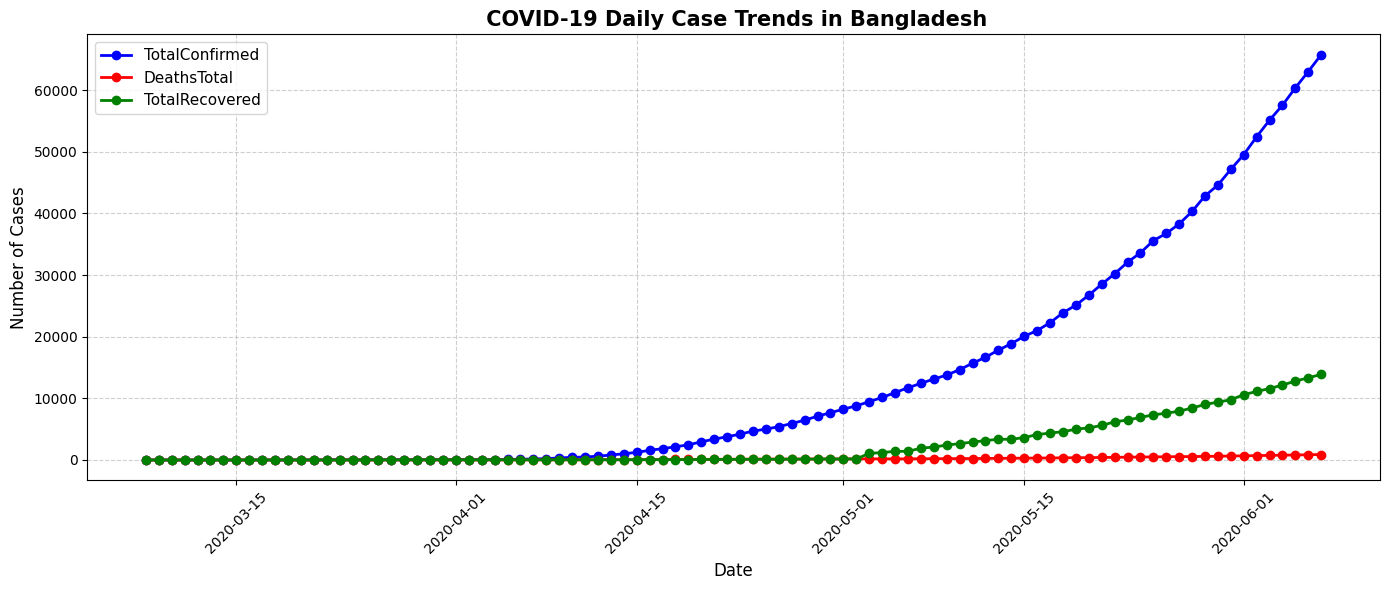


 Statistical Summary (Cumulative Totals and Insights):

TotalConfirmed Statistics:
   - Total: 1,206,009
   - Average per Day: 13108.79
   - Maximum: 65,769 (on 2020-06-07)
   - Minimum: 3
   - Active Days (non-zero): 92 days

DeathsTotal Statistics:
   - Total: 18,401
   - Average per Day: 200.01
   - Maximum: 888 (on 2020-06-07)
   - Minimum: 0
   - Active Days (non-zero): 82 days

TotalRecovered Statistics:
   - Total: 226,512
   - Average per Day: 2462.09
   - Maximum: 13,903 (on 2020-06-07)
   - Minimum: 0
   - Active Days (non-zero): 89 days



In [ ]:
# ==== Load Dataset ====
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Read CSV
df = pd.read_csv(file_path)

# ==== Validate & Prepare Columns ====
print(" Available Columns:", df.columns.tolist())

if 'Date' not in df.columns:
    raise ValueError(" 'Date' column not found in dataset.")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df.columns = df.columns.str.strip()

columns_to_plot = ['TotalConfirmed', 'DeathsTotal']
if 'TotalRecovered' in df.columns:
    columns_to_plot.append('TotalRecovered')

# ==== Prepare Data ====
df = df[['Date'] + columns_to_plot].copy()
df = df.sort_values('Date')

# ==== Plot ====
plt.figure(figsize=(14, 6))
colors = ['blue', 'red', 'green']
for col, color in zip(columns_to_plot, colors):
    plt.plot(df['Date'], df[col], label=col, color=color, marker='o', linewidth=2)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.title(" COVID-19 Daily Case Trends in Bangladesh", fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# ==== Summary Statistics ====
print("\n Statistical Summary (Cumulative Totals and Insights):\n")

for col in columns_to_plot:
    total = df[col].sum()
    mean = df[col].mean()
    max_val = df[col].max()
    min_val = df[col].min()
    non_zero_days = df[df[col] > 0].shape[0]
    peak_date = df[df[col] == max_val]['Date'].dt.strftime('%Y-%m-%d').values[0]

    print(f"{col} Statistics:")
    print(f"   - Total: {total:,}")
    print(f"   - Average per Day: {mean:.2f}")
    print(f"   - Maximum: {max_val:,} (on {peak_date})")
    print(f"   - Minimum: {min_val:,}")
    print(f"   - Active Days (non-zero): {non_zero_days} days\n")





# **4.2 BANGLADESH COVID 19  ANALYSIS IN  PIE CHART AND PERCENT**

COVID-19 Cases in Bangladesh (Latest Data):

       Category  Total Percentage
Confirmed Cases  65769     81.64%
         Deaths    888      1.10%
      Recovered  13903     17.26%


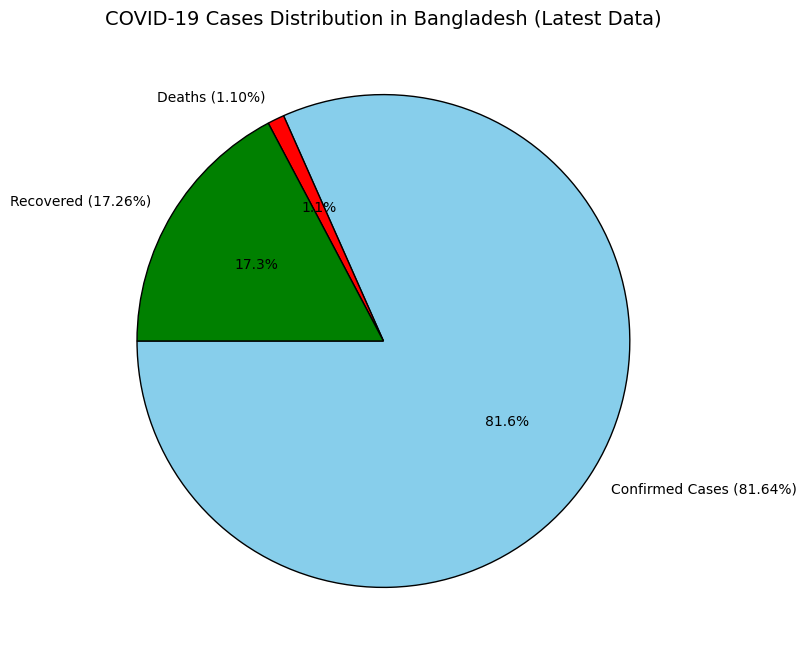

In [ ]:
# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Get the latest data (last row)
latest_data = df.iloc[-1]

# Extract relevant values
total_cases = latest_data["TotalConfirmed"]
total_deaths = latest_data["DeathsTotal"]
total_recovered = latest_data["TotalRecovered"]

# Prepare data for matrix/table
total_all = total_cases + total_deaths + total_recovered
data = {
    "Category": ["Confirmed Cases", "Deaths", "Recovered"],
    "Total": [total_cases, total_deaths, total_recovered],
    "Percentage": [f"{(x / total_all) * 100:.2f}%" for x in [total_cases, total_deaths, total_recovered]]
}

# Convert to DataFrame and display
result_df = pd.DataFrame(data)
print("COVID-19 Cases in Bangladesh (Latest Data):\n")
print(result_df.to_string(index=False))

# Pie chart visualization
plt.figure(figsize=(8, 8))
plt.pie(
    [total_cases, total_deaths, total_recovered],
    labels=[f"{row['Category']} ({row['Percentage']})" for _, row in result_df.iterrows()],
    autopct='%1.1f%%',
    colors=["skyblue", "red", "green"],
    startangle=180,
    wedgeprops={"edgecolor": "black"}
)

plt.title("COVID-19 Cases Distribution in Bangladesh (Latest Data)", fontsize=14)
plt.show()



# **4.3 BANGLADESH COVID 19 CORRELATION**

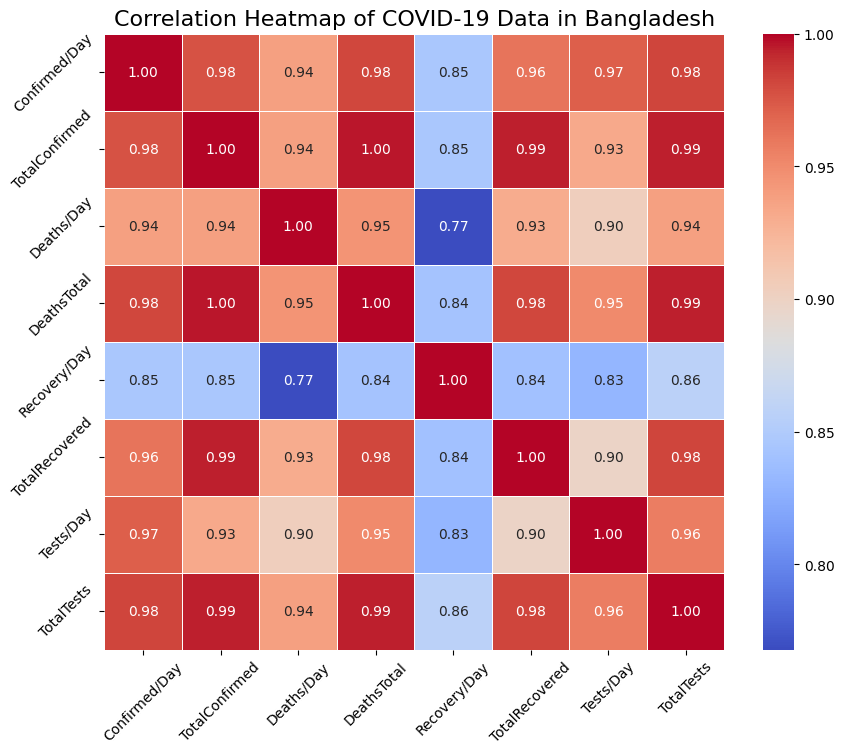

In [ ]:
# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Selecting numerical columns for correlation
num_columns = ["Confirmed/Day", "TotalConfirmed", "Deaths/Day", "DeathsTotal",
               "Recovery/Day", "TotalRecovered", "Tests/Day", "TotalTests"]

# Calculate the correlation matrix
correlation_matrix = df[num_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and formatting
plt.title("Correlation Heatmap of COVID-19 Data in Bangladesh", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show plot
plt.show()


#**4.4 Bangladesh Covid19 Total ConFirmed-Actual Vs Predicted Used-LSTM Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Evaluation Metrics:
Mean Squared Error (MSE): 1224157.47
Root Mean Squared Error (RMSE): 1106.42
Mean Absolute Error (MAE): 968.03
R Score: 0.9899

Prediction Results (Last 10 rows):
            Actual Confirmed  Predicted Confirmed   Difference  \
Date                                                             
2020-05-29           42844.0         44141.015625 -1297.015625   
2020-05-30           44608.0         46339.804688 -1731.804688   
2020-05-31           47153.0         48578.593750 -1425.593750   
2020-06-01           49534.0         50893.566406 -1359.566406   
2020-06-02           52445.0         53296.953125  -851.953125   
2020-06-03           55140.0         55819.449219  -679.449219   
2020-06-04           57563.0         58477.253906  -914.253906   
2020-06-05           60391.0         61204.757812  -813.757812   
2020-06-06           63026.0         64052.351562 -1026.351562   
2020-06-07           65769.0         66965.054688 -1

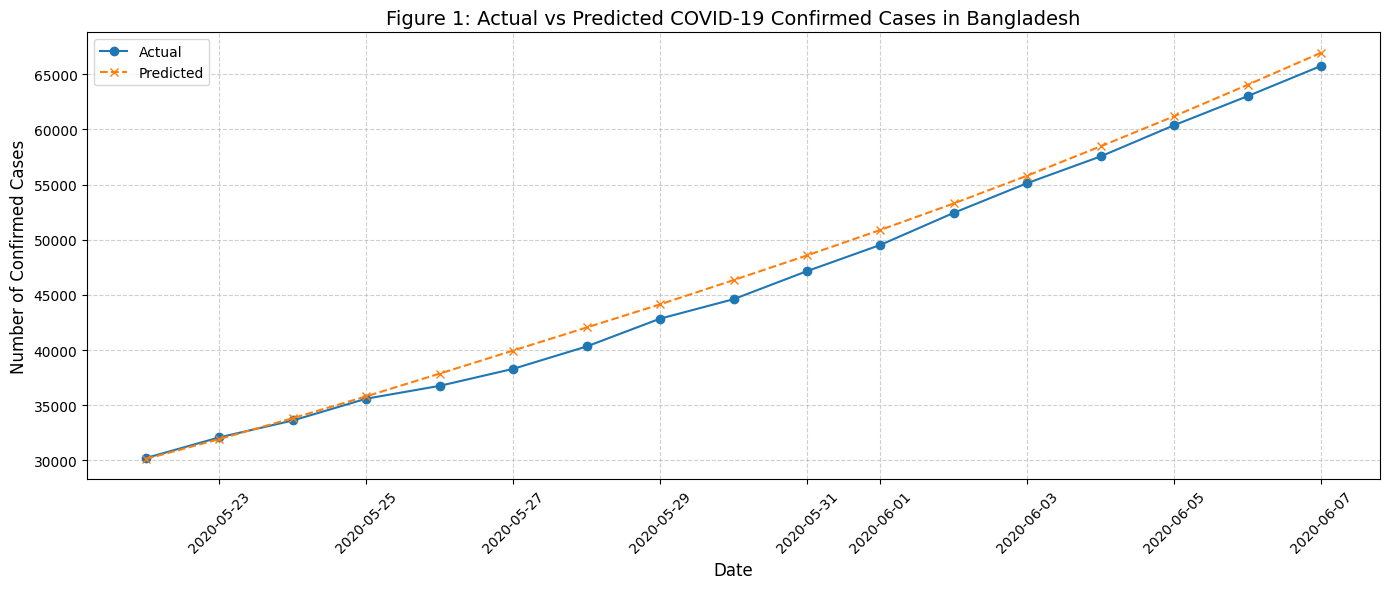

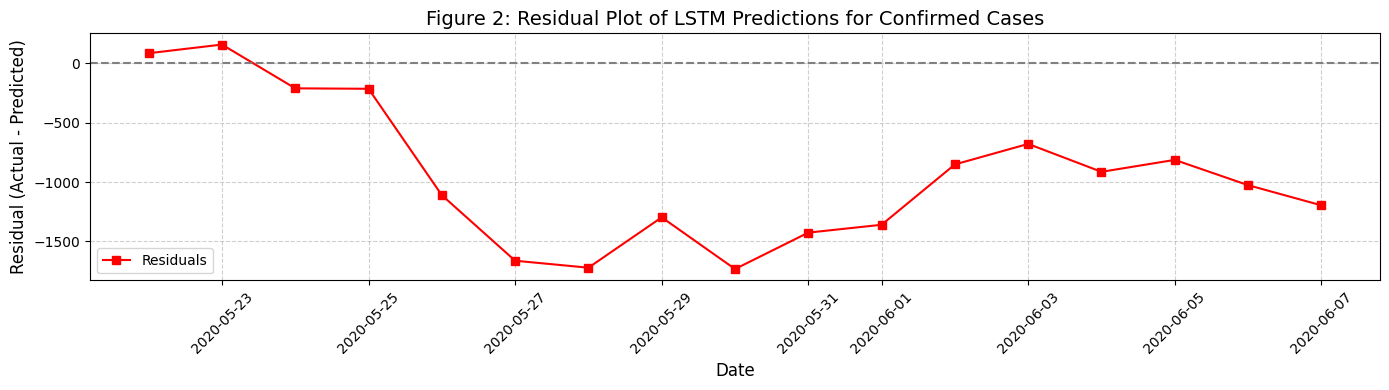

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Fix all random seeds for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Load dataset
df = pd.read_csv("/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df[["Date", "TotalConfirmed"]].dropna()
df.set_index("Date", inplace=True)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["TotalConfirmed"]])

# Sequence preparation
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

# Split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R Score: {r2:.4f}")

# Prediction Results Table
dates = df.index[-len(y_test_inv):]
results_df = pd.DataFrame({
    "Actual Confirmed": y_test_inv,
    "Predicted Confirmed": y_pred_inv,
    "Difference": y_test_inv - y_pred_inv,
    "Percentage Error": ((y_test_inv - y_pred_inv) / y_test_inv) * 100
}, index=dates)

print("\nPrediction Results (Last 10 rows):")
print(results_df.tail(10))

# Plot: Actual vs Predicted Confirmed Cases
plt.figure(figsize=(14, 6))
plt.plot(dates, y_test_inv, label="Actual", marker='o')
plt.plot(dates, y_pred_inv, label="Predicted", linestyle='--', marker='x')
plt.title("Figure 1: Actual vs Predicted COVID-19 Confirmed Cases in Bangladesh", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Confirmed Cases", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot: Residuals (Prediction Error)
residuals = y_test_inv - y_pred_inv
plt.figure(figsize=(14, 4))
plt.plot(dates, residuals, color="red", label="Residuals", marker='s')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Figure 2: Residual Plot of LSTM Predictions for Confirmed Cases", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Residual (Actual - Predicted)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



# **4.5 BANGLADESH COVID 19  Actual vs Predicted Total Deaths**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Evaluation Metrics for DeathsTotal:
Mean Squared Error (MSE): 3610.86
Root Mean Squared Error (RMSE): 60.09
Mean Absolute Error (MAE): 49.12
R Score: 0.8124

Prediction Results (Last 10 rows):
            Actual Deaths  Predicted Deaths  Difference  Percentage Error
Date                                                                     
2020-05-29          582.0        634.267517  -52.267517         -8.980673
2020-05-30          610.0        666.416565  -56.416565         -9.248617
2020-05-31          650.0        699.708191  -49.708191         -7.647414
2020-06-01          672.0        735.604797  -63.604797         -9.465000
2020-06-02          709.0        772.921082  -63.921082         -9.015667
2020-06-03          746.0        813.026794  -67.026794         -8.984825
2020-06-04          781.0        855.916809  -74.916809         -9.592421
2020-06-05          811.0        901.958496  -90.958496        -11.215598
2020-06-06          846.0   

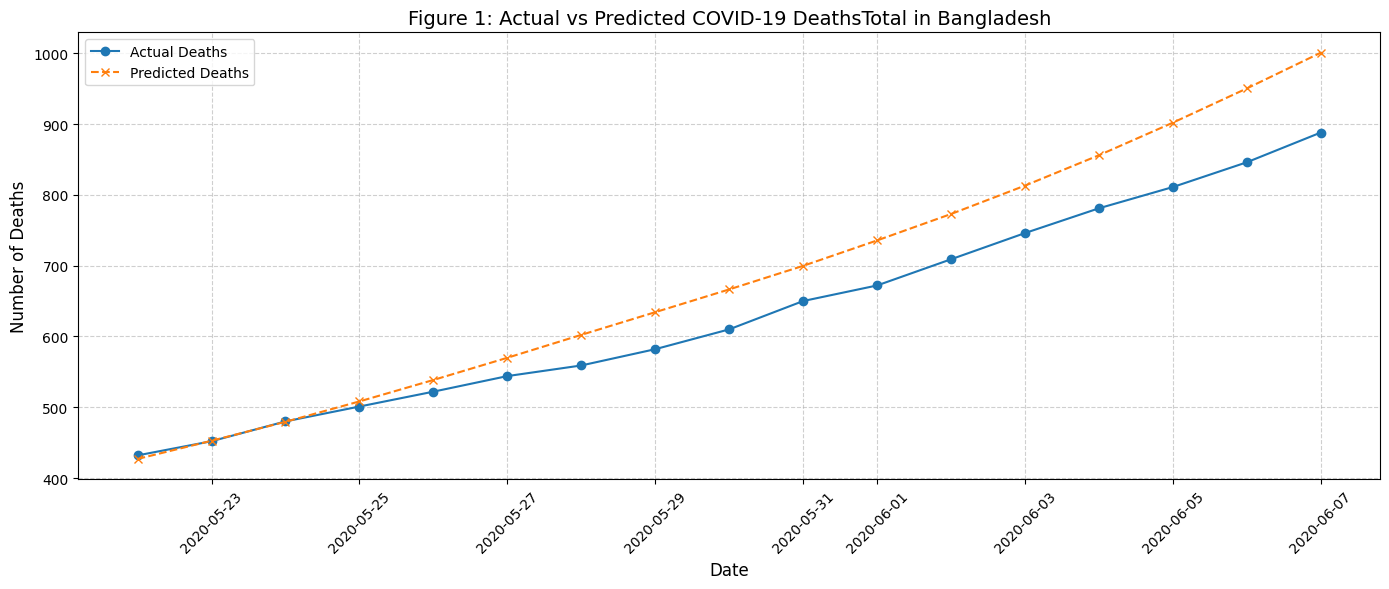

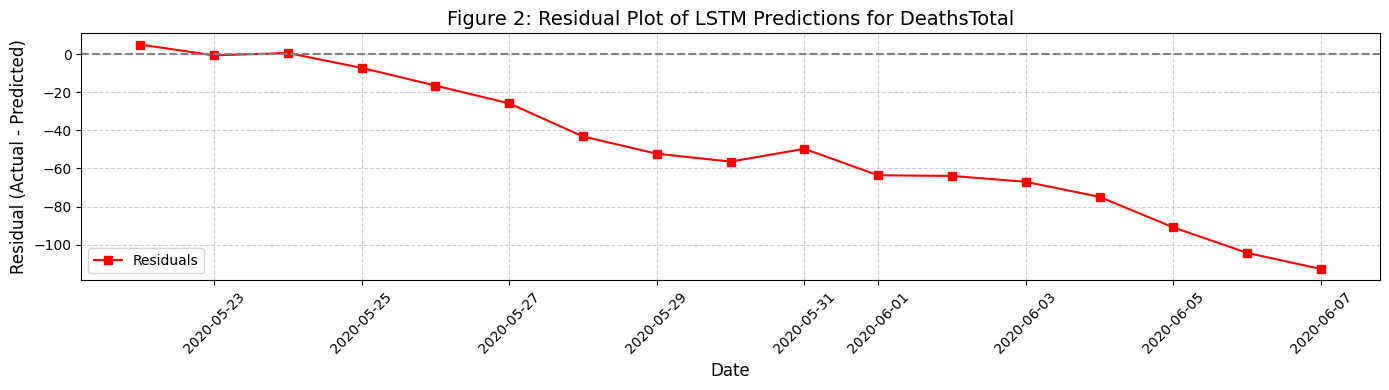

In [14]:
# Fix all random seeds for reproducibility
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Load dataset
df = pd.read_csv("/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df[["Date", "DeathsTotal"]].dropna()
df.set_index("Date", inplace=True)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["DeathsTotal"]])

# Sequence preparation
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

# Split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Evaluation Metrics for DeathsTotal:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R Score: {r2:.4f}")

# Prediction Results Table
dates = df.index[-len(y_test_inv):]
results_df = pd.DataFrame({
    "Actual Deaths": y_test_inv,
    "Predicted Deaths": y_pred_inv,
    "Difference": y_test_inv - y_pred_inv,
    "Percentage Error": ((y_test_inv - y_pred_inv) / y_test_inv) * 100
}, index=dates)

print("\nPrediction Results (Last 10 rows):")
print(results_df.tail(10))

# Plot: Actual vs Predicted DeathsTotal
plt.figure(figsize=(14, 6))
plt.plot(dates, y_test_inv, label="Actual Deaths", marker='o')
plt.plot(dates, y_pred_inv, label="Predicted Deaths", linestyle='--', marker='x')
plt.title("Figure 1: Actual vs Predicted COVID-19 DeathsTotal in Bangladesh", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot: Residuals (Prediction Error)
residuals = y_test_inv - y_pred_inv
plt.figure(figsize=(14, 4))
plt.plot(dates, residuals, color="red", label="Residuals", marker='s')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Figure 2: Residual Plot of LSTM Predictions for DeathsTotal", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Residual (Actual - Predicted)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()





# **4.6 BANGLADESH COVID 19 Actual vs Predicted Total Recovered**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Evaluation Metrics for TotalRecovered:
Mean Squared Error (MSE): 1053905.19
Root Mean Squared Error (RMSE): 1026.60
Mean Absolute Error (MAE): 848.78
R Score: 0.8187

Prediction Results (Last 10 rows):
            Actual Recovered  Predicted Recovered   Difference  \
Date                                                             
2020-05-29            9015.0          8387.522461   627.477539   
2020-05-30            9375.0          8735.791016   639.208984   
2020-05-31            9781.0          9069.023438   711.976562   
2020-06-01           10597.0          9405.918945  1191.081055   
2020-06-02           11120.0          9829.804688  1290.195312   
2020-06-03           11590.0         10274.143555  1315.856445   
2020-06-04           12161.0         10725.070312  1435.929688   
2020-06-05           12804.0         11177.155273  1626.844727   
2020-06-06           13325.0         11610.646484  1714.353516   
2020-06-07           13903.0     

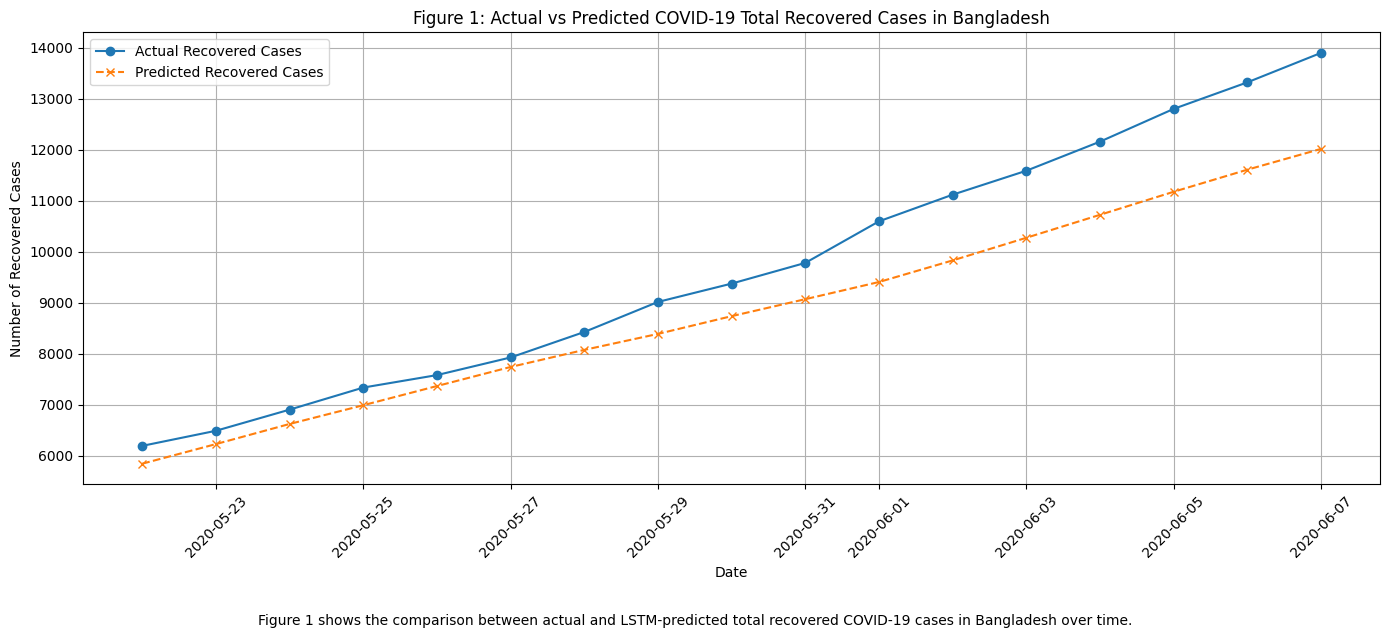

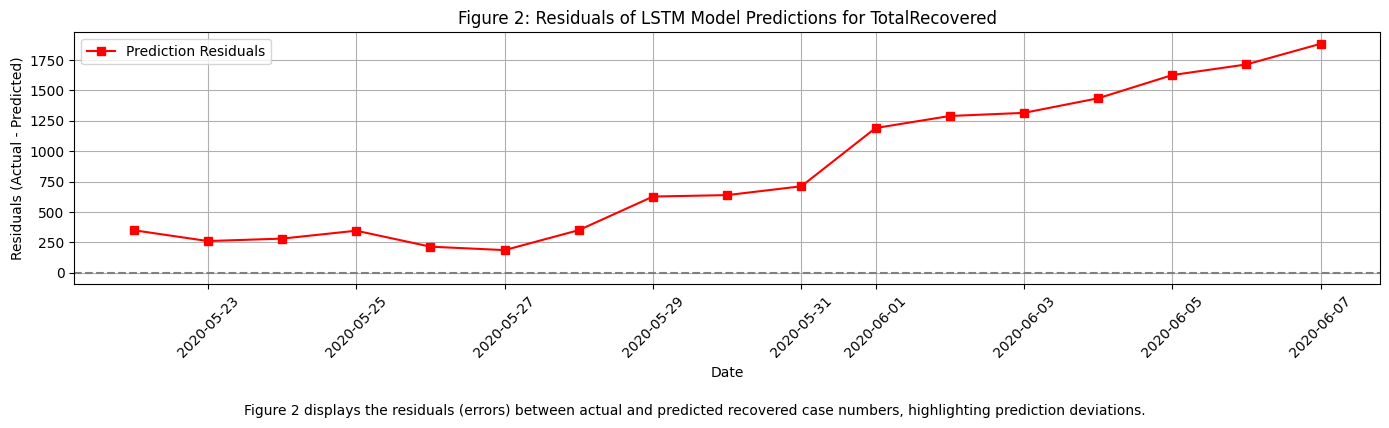

In [15]:
# Fix all random seeds for reproducibility
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Set seed for reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Load dataset
df = pd.read_csv("/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df[["Date", "TotalRecovered"]].dropna()
df.set_index("Date", inplace=True)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["TotalRecovered"]])

# Sequence preparation
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Evaluation Metrics for TotalRecovered:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R Score: {r2:.4f}")

# Prediction Results Table
dates = df.index[-len(y_test_inv):]
results_df = pd.DataFrame({
    "Actual Recovered": y_test_inv,
    "Predicted Recovered": y_pred_inv,
    "Difference": y_test_inv - y_pred_inv,
    "Percentage Error": ((y_test_inv - y_pred_inv) / y_test_inv) * 100
}, index=dates)

print("\nPrediction Results (Last 10 rows):")
print(results_df.tail(10))

# Plot Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(dates, y_test_inv, label="Actual Recovered Cases", marker='o')
plt.plot(dates, y_pred_inv, label="Predicted Recovered Cases", linestyle='--', marker='x')
plt.title("Figure 1: Actual vs Predicted COVID-19 Total Recovered Cases in Bangladesh")
plt.xlabel("Date")
plt.ylabel("Number of Recovered Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.figtext(0.5, -0.05,
            "Figure 1 shows the comparison between actual and LSTM-predicted total recovered COVID-19 cases in Bangladesh over time.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# Residual Plot
residuals = y_test_inv - y_pred_inv
plt.figure(figsize=(14, 4))
plt.plot(dates, residuals, color="red", label="Prediction Residuals", marker='s')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Figure 2: Residuals of LSTM Model Predictions for TotalRecovered")
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.figtext(0.5, -0.05,
            "Figure 2 displays the residuals (errors) between actual and predicted recovered case numbers, highlighting prediction deviations.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()



---------
------------

# **Chapter-5- BANGLADESH V/S WORLD PRIDICTION**

Bangladesh Totals:
  Confirmed Cases: 12,707,434
  Deaths: 167,658
  Recovered: 5,972,993

World Totals (excluding Bangladesh):
  Confirmed Cases: 1,114,732,985.0
  Deaths: 54,286,234.0
  Recovered: 568,297,813.0


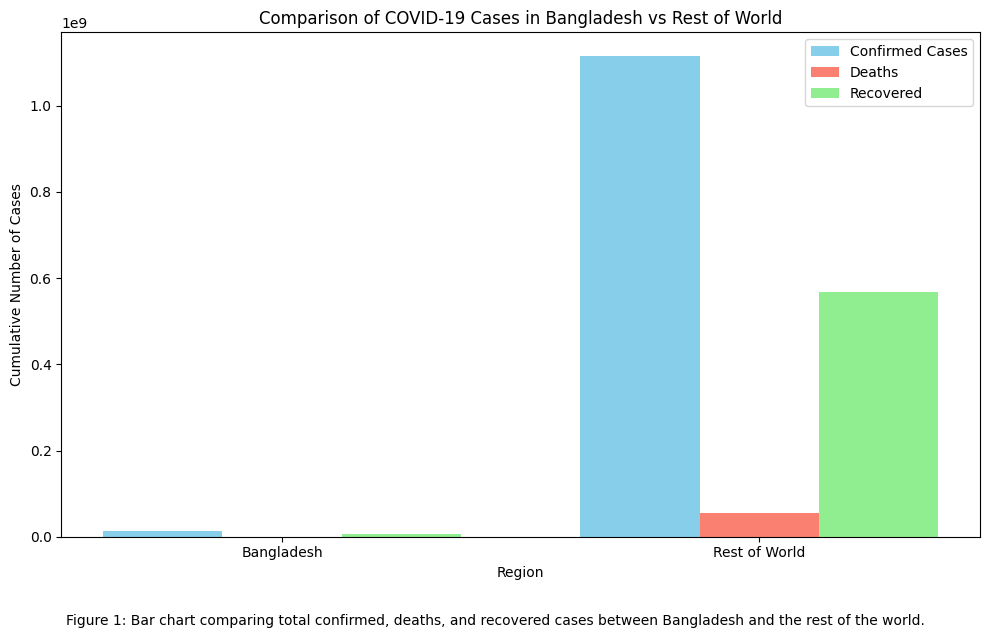

Training LSTM model for Confirmed...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model for Deaths...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model for Recovered...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


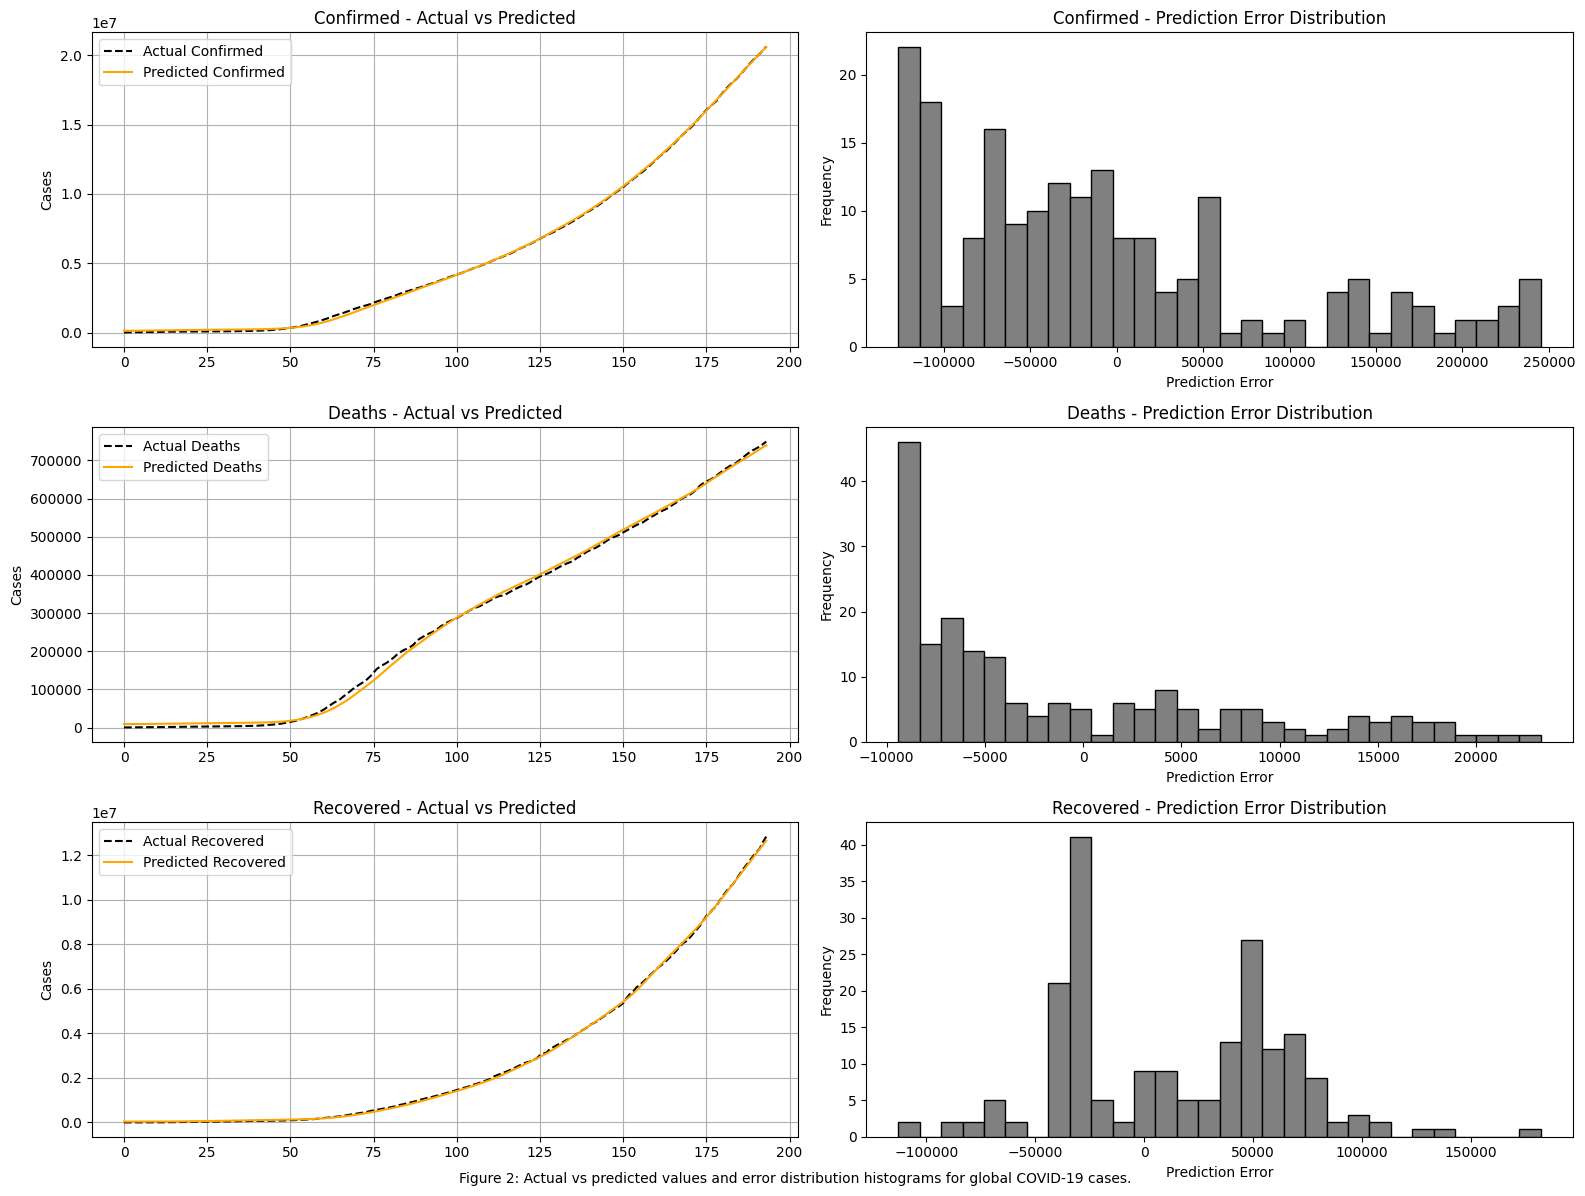

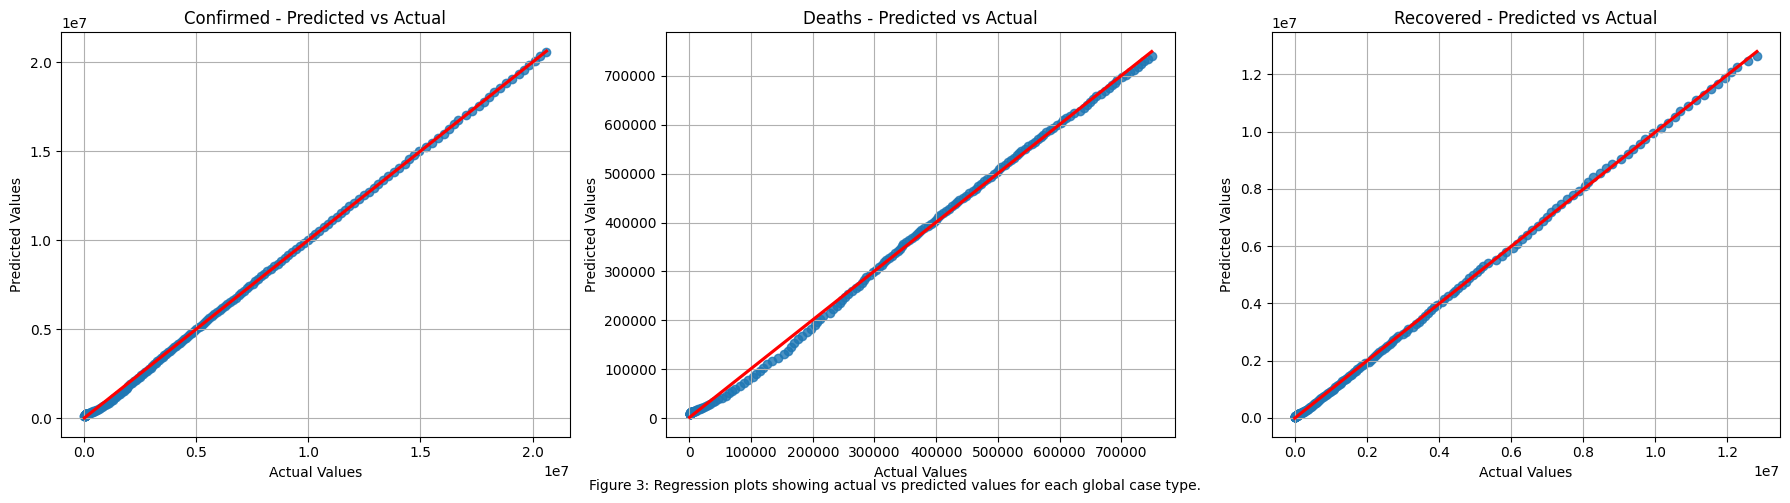

        Case           MSE          RMSE           MAE        R2
0  Confirmed  9.739112e+09  98686.938612  79334.730227  0.999728
1     Deaths  7.378243e+07   8589.669955   7465.653502  0.998754
2  Recovered  2.808886e+09  52998.923619  45534.190158  0.999781
Training LSTM model for Bangladesh Confirmed...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model for Bangladesh Deaths...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model for Bangladesh Recovered...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


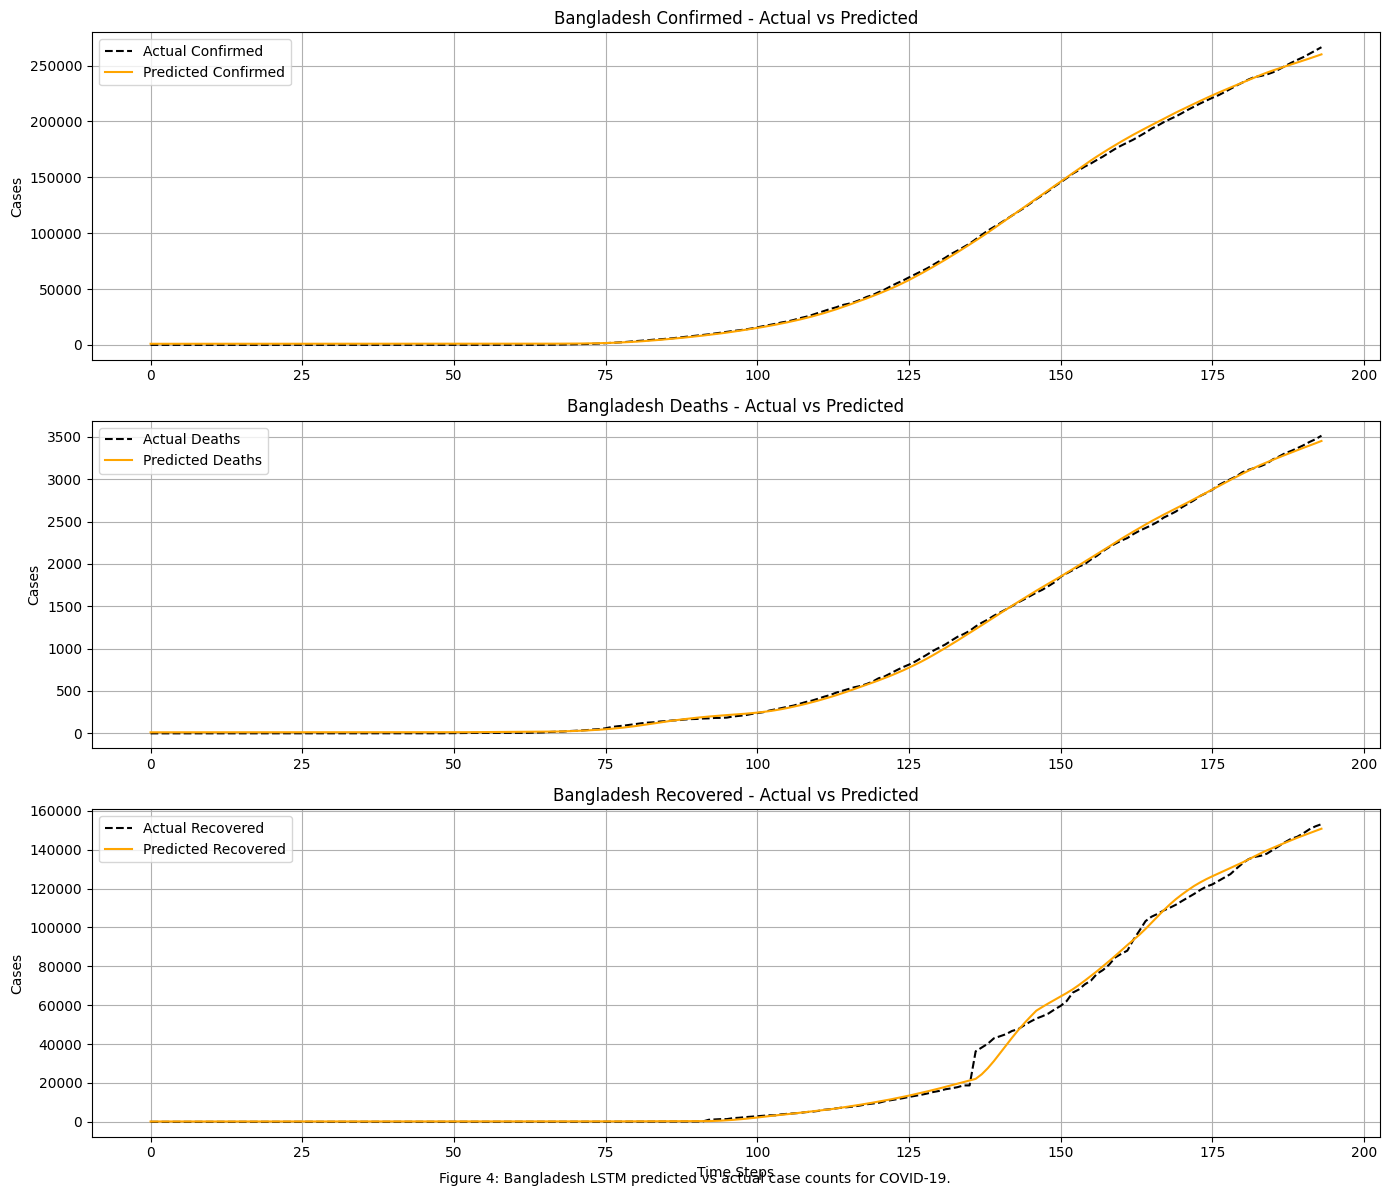

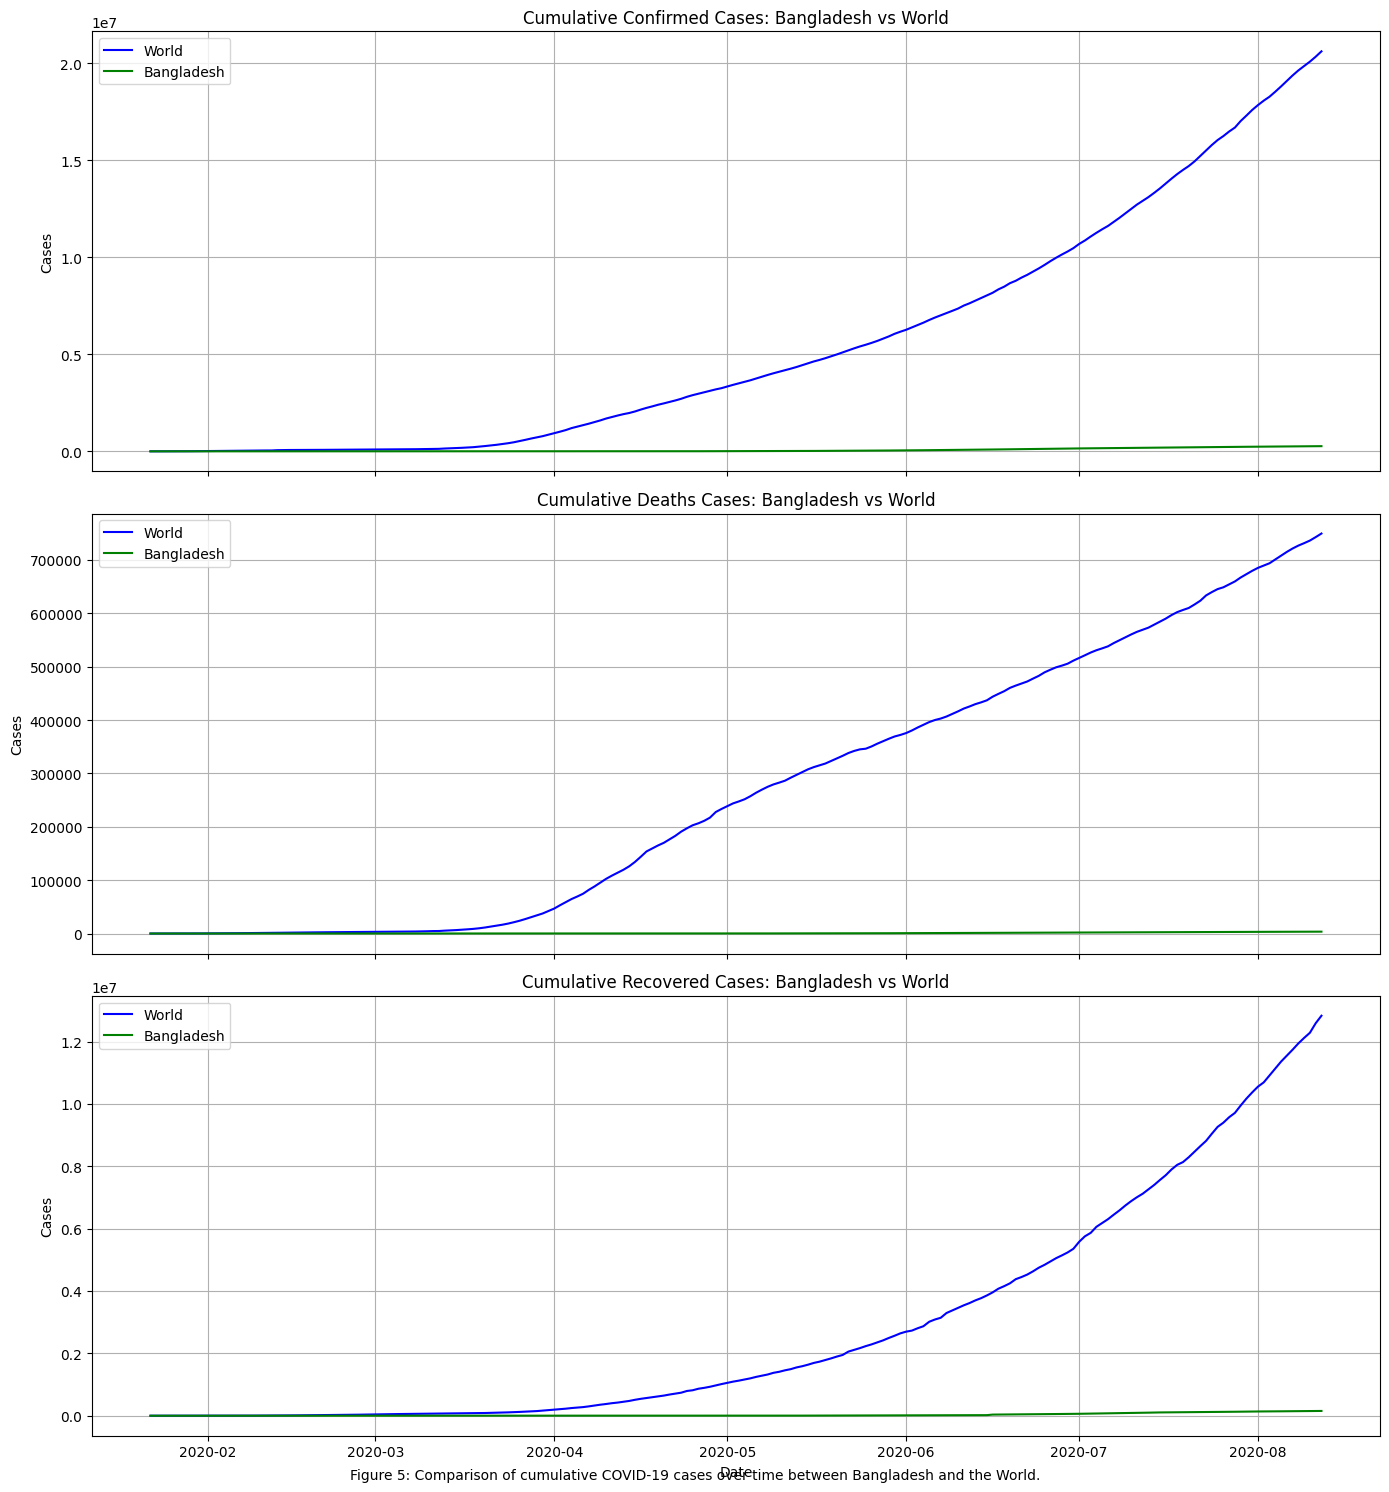

In [16]:
# ==== Imports ====
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

# ==== Seed for Reproducibility ====
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# ==== Load Dataset ====
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Clean columns & dates
df.columns = df.columns.str.strip()
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')

# Identify country column
country_col = None
for col in ['Country/Region', 'Country_Region', 'Country']:
    if col in df.columns:
        country_col = col
        break
if not country_col:
    raise ValueError("Country column not found.")

# Aggregate total confirmed, deaths, recovered by country
world_summary = df.groupby(country_col)[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Extract Bangladesh data
bd_data = world_summary[world_summary[country_col].str.lower() == 'bangladesh']
if bd_data.empty:
    raise ValueError("Bangladesh data not found.")
bd_confirmed = int(bd_data['Confirmed'].values[0])
bd_deaths = int(bd_data['Deaths'].values[0])
bd_recovered = int(bd_data['Recovered'].values[0])

print(f"Bangladesh Totals:")
print(f"  Confirmed Cases: {bd_confirmed:,}")
print(f"  Deaths: {bd_deaths:,}")
print(f"  Recovered: {bd_recovered:,}")

# World totals excluding Bangladesh
world_excl_bd = world_summary[world_summary[country_col].str.lower() != 'bangladesh']
world_total_confirmed = world_excl_bd['Confirmed'].sum()
world_total_deaths = world_excl_bd['Deaths'].sum()
world_total_recovered = world_excl_bd['Recovered'].sum()

print(f"\nWorld Totals (excluding Bangladesh):")
print(f"  Confirmed Cases: {world_total_confirmed:,}")
print(f"  Deaths: {world_total_deaths:,}")
print(f"  Recovered: {world_total_recovered:,}")

# ==== Plot Bangladesh vs Rest of World Cumulative Totals ====
comparison_df = pd.DataFrame({
    country_col: ['Bangladesh', 'Rest of World'],
    'Confirmed': [bd_confirmed, world_total_confirmed],
    'Deaths': [bd_deaths, world_total_deaths],
    'Recovered': [bd_recovered, world_total_recovered]
})

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
positions = np.arange(len(comparison_df))
ax.bar(positions - bar_width, comparison_df['Confirmed'], width=bar_width, label='Confirmed Cases', color='skyblue')
ax.bar(positions, comparison_df['Deaths'], width=bar_width, label='Deaths', color='salmon')
ax.bar(positions + bar_width, comparison_df['Recovered'], width=bar_width, label='Recovered', color='lightgreen')

ax.set_xticks(positions)
ax.set_xticklabels(comparison_df[country_col])
ax.set_ylabel('Cumulative Number of Cases')
ax.set_xlabel('Region')
ax.set_title('Comparison of COVID-19 Cases in Bangladesh vs Rest of World')
ax.legend()
plt.figtext(0.5, -0.05, 'Figure 1: Bar chart comparing total confirmed, deaths, and recovered cases between Bangladesh and the rest of the world.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

# ==== Prepare Global Daily Data ====
daily_global = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
daily_global.set_index('ObservationDate', inplace=True)
daily_global['Recovered'] = daily_global['Recovered'].fillna(0)

# ==== Helper Function ====
def prepare_lstm_data(series, time_steps=10):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i:i+time_steps])
        y.append(series[i+time_steps])
    return np.array(X), np.array(y)

# ==== Normalize and Prepare Datasets ====
time_steps = 10
scalers, datasets, normalized = {}, {}, {}
for case in ['Confirmed', 'Deaths', 'Recovered']:
    scaler = MinMaxScaler()
    norm_data = scaler.fit_transform(daily_global[[case]])
    scalers[case] = scaler
    normalized[case] = norm_data
    X, y = prepare_lstm_data(norm_data, time_steps)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    datasets[case] = (X, y)

# ==== Build and Train LSTM ====
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

all_predictions = {}
for case in ['Confirmed', 'Deaths', 'Recovered']:
    print(f"Training LSTM model for {case}...")
    X, y = datasets[case]
    model = build_lstm_model((X.shape[1], 1))
    model.fit(X, y, epochs=20, batch_size=8, verbose=0)
    y_pred_scaled = model.predict(X, verbose=0)
    y_pred = scalers[case].inverse_transform(y_pred_scaled).flatten()
    y_true = scalers[case].inverse_transform(y).flatten()
    all_predictions[case] = (y_true, y_pred)

# ==== Plot Actual vs Predicted and Error ====
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
for idx, case in enumerate(['Confirmed', 'Deaths', 'Recovered']):
    y_true, y_pred = all_predictions[case]
    axs[idx, 0].plot(y_true, linestyle='--', label=f"Actual {case}", color='black')
    axs[idx, 0].plot(y_pred, label=f"Predicted {case}", color='orange')
    axs[idx, 0].set_title(f"{case} - Actual vs Predicted")
    axs[idx, 0].set_ylabel('Cases')
    axs[idx, 0].legend()
    axs[idx, 0].grid(True)

    axs[idx, 1].hist(y_true - y_pred, bins=30, color='gray', edgecolor='black')
    axs[idx, 1].set_title(f"{case} - Prediction Error Distribution")
    axs[idx, 1].set_xlabel("Prediction Error")
    axs[idx, 1].set_ylabel("Frequency")

plt.figtext(0.5, 0.01, 'Figure 2: Actual vs predicted values and error distribution histograms for global COVID-19 cases.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

# ==== Evaluation and Regression ====
metrics = []
fig, reg_axs = plt.subplots(1, 3, figsize=(18, 5))
for idx, case in enumerate(['Confirmed', 'Deaths', 'Recovered']):
    y_true, y_pred = all_predictions[case]
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    metrics.append({'Case': case, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

    sns.regplot(x=y_true, y=y_pred, ax=reg_axs[idx], line_kws={'color':'red'})
    reg_axs[idx].set_title(f"{case} - Predicted vs Actual")
    reg_axs[idx].set_xlabel('Actual Values')
    reg_axs[idx].set_ylabel('Predicted Values')
    reg_axs[idx].grid(True)

plt.figtext(0.5, 0.01, 'Figure 3: Regression plots showing actual vs predicted values for each global case type.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

print(pd.DataFrame(metrics))

# ==== Prepare Bangladesh Daily Data ====
bd_daily = df[df[country_col].str.lower() == 'bangladesh'].groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()
all_dates = pd.date_range(start=daily_global.index.min(), end=daily_global.index.max())
bd_daily = bd_daily.reindex(all_dates, fill_value=0)
bd_daily.index.name = 'ObservationDate'

bd_scalers, bd_datasets = {}, {}
for case in ['Confirmed', 'Deaths', 'Recovered']:
    scaler = MinMaxScaler()
    norm_data = scaler.fit_transform(bd_daily[[case]])
    bd_scalers[case] = scaler
    X, y = prepare_lstm_data(norm_data, time_steps)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    bd_datasets[case] = (X, y)

# ==== Train Bangladesh LSTM Models ====
bd_predictions = {}
for case in ['Confirmed', 'Deaths', 'Recovered']:
    print(f"Training LSTM model for Bangladesh {case}...")
    X, y = bd_datasets[case]
    model = build_lstm_model((X.shape[1], 1))
    model.fit(X, y, epochs=20, batch_size=8, verbose=0)
    y_pred = model.predict(X, verbose=0)
    y_pred = bd_scalers[case].inverse_transform(y_pred).flatten()
    y_true = bd_scalers[case].inverse_transform(y).flatten()
    bd_predictions[case] = (y_true, y_pred)

# ==== Plot Bangladesh Actual vs Predicted ====
fig, axs = plt.subplots(3, 1, figsize=(14, 12))
for idx, case in enumerate(['Confirmed', 'Deaths', 'Recovered']):
    y_true, y_pred = bd_predictions[case]
    axs[idx].plot(y_true, linestyle='--', label=f"Actual {case}", color='black')
    axs[idx].plot(y_pred, label=f"Predicted {case}", color='orange')
    axs[idx].set_title(f"Bangladesh {case} - Actual vs Predicted")
    axs[idx].set_ylabel('Cases')
    axs[idx].legend()
    axs[idx].grid(True)

axs[-1].set_xlabel('Time Steps')
plt.figtext(0.5, 0.01, 'Figure 4: Bangladesh LSTM predicted vs actual case counts for COVID-19.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()

# ==== Time Series Bangladesh vs World ====
fig, ax = plt.subplots(3, 1, figsize=(14, 15), sharex=True)
for i, case in enumerate(['Confirmed', 'Deaths', 'Recovered']):
    ax[i].plot(daily_global.index, daily_global[case], label='World', color='blue')
    ax[i].plot(bd_daily.index, bd_daily[case], label='Bangladesh', color='green')
    ax[i].set_title(f"Cumulative {case} Cases: Bangladesh vs World")
    ax[i].set_ylabel('Cases')
    ax[i].legend()
    ax[i].grid(True)

ax[-1].set_xlabel('Date')
plt.figtext(0.5, 0.01, 'Figure 5: Comparison of cumulative COVID-19 cases over time between Bangladesh and the World.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.show()




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# ==== Combined Evaluation Metrics for Global and Bangladesh ====
combined_metrics = []

for case in ['Confirmed', 'Deaths', 'Recovered']:
    # Global metrics
    y_true_g, y_pred_g = all_predictions[case]
    mse_g = mean_squared_error(y_true_g, y_pred_g)
    rmse_g = np.sqrt(mse_g)
    mae_g = mean_absolute_error(y_true_g, y_pred_g)
    r2_g = r2_score(y_true_g, y_pred_g)

    # Bangladesh metrics
    y_true_b, y_pred_b = bd_predictions[case]
    mse_b = mean_squared_error(y_true_b, y_pred_b)
    rmse_b = np.sqrt(mse_b)
    mae_b = mean_absolute_error(y_true_b, y_pred_b)
    r2_b = r2_score(y_true_b, y_pred_b)

    combined_metrics.append({
        'Case': case,
        'Global_MSE': mse_g,
        'Global_RMSE': rmse_g,
        'Global_MAE': mae_g,
        'Global_R2': r2_g,
        'Bangladesh_MSE': mse_b,
        'Bangladesh_RMSE': rmse_b,
        'Bangladesh_MAE': mae_b,
        'Bangladesh_R2': r2_b,
    })

combined_metrics_df = pd.DataFrame(combined_metrics)

print("\nCombined Evaluation Metrics (Global vs Bangladesh):\n")
print(combined_metrics_df.to_string(index=False))




Combined Evaluation Metrics (Global vs Bangladesh):

     Case   Global_MSE  Global_RMSE   Global_MAE  Global_R2  Bangladesh_MSE  Bangladesh_RMSE  Bangladesh_MAE  Bangladesh_R2
Confirmed 9.739118e+09 98686.971394 79334.799332   0.999728    2.681697e+06      1637.588916     1291.200623       0.999640
   Deaths 7.378249e+07  8589.673593  7465.659799   0.998754    4.268625e+02        20.660651       17.218381       0.999656
Recovered 2.808887e+09 52998.936832 45534.182728   0.999781    6.260768e+06      2502.152668     1193.339715       0.997255


#**5.2 Final Model Selection & Final Result**

# **Final LSTM-Based Forecasting Model Using 80% Global and 20% Bangladesh COVID-19 Data.**

# **LMST Model**

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0677 - mae: 0.1719 - val_loss: 0.6110 - val_mae: 0.7777
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mae: 0.1473 - val_loss: 0.4111 - val_mae: 0.6374
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0260 - mae: 0.1282 - val_loss: 0.2325 - val_mae: 0.4788
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0185 - mae: 0.1193 - val_loss: 0.1058 - val_mae: 0.3231
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - mae: 0.1042 - val_loss: 0.0418 - val_mae: 0.2039
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 - mae: 0.0820 - val_loss: 0.0065 - val_mae: 0.0794
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - mae: 0.0734 - val_loss: 0.0014 - val_mae: 0.0314
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - mae: 0.0470 - val_loss: 0.0012 - val_mae: 0.0308
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0

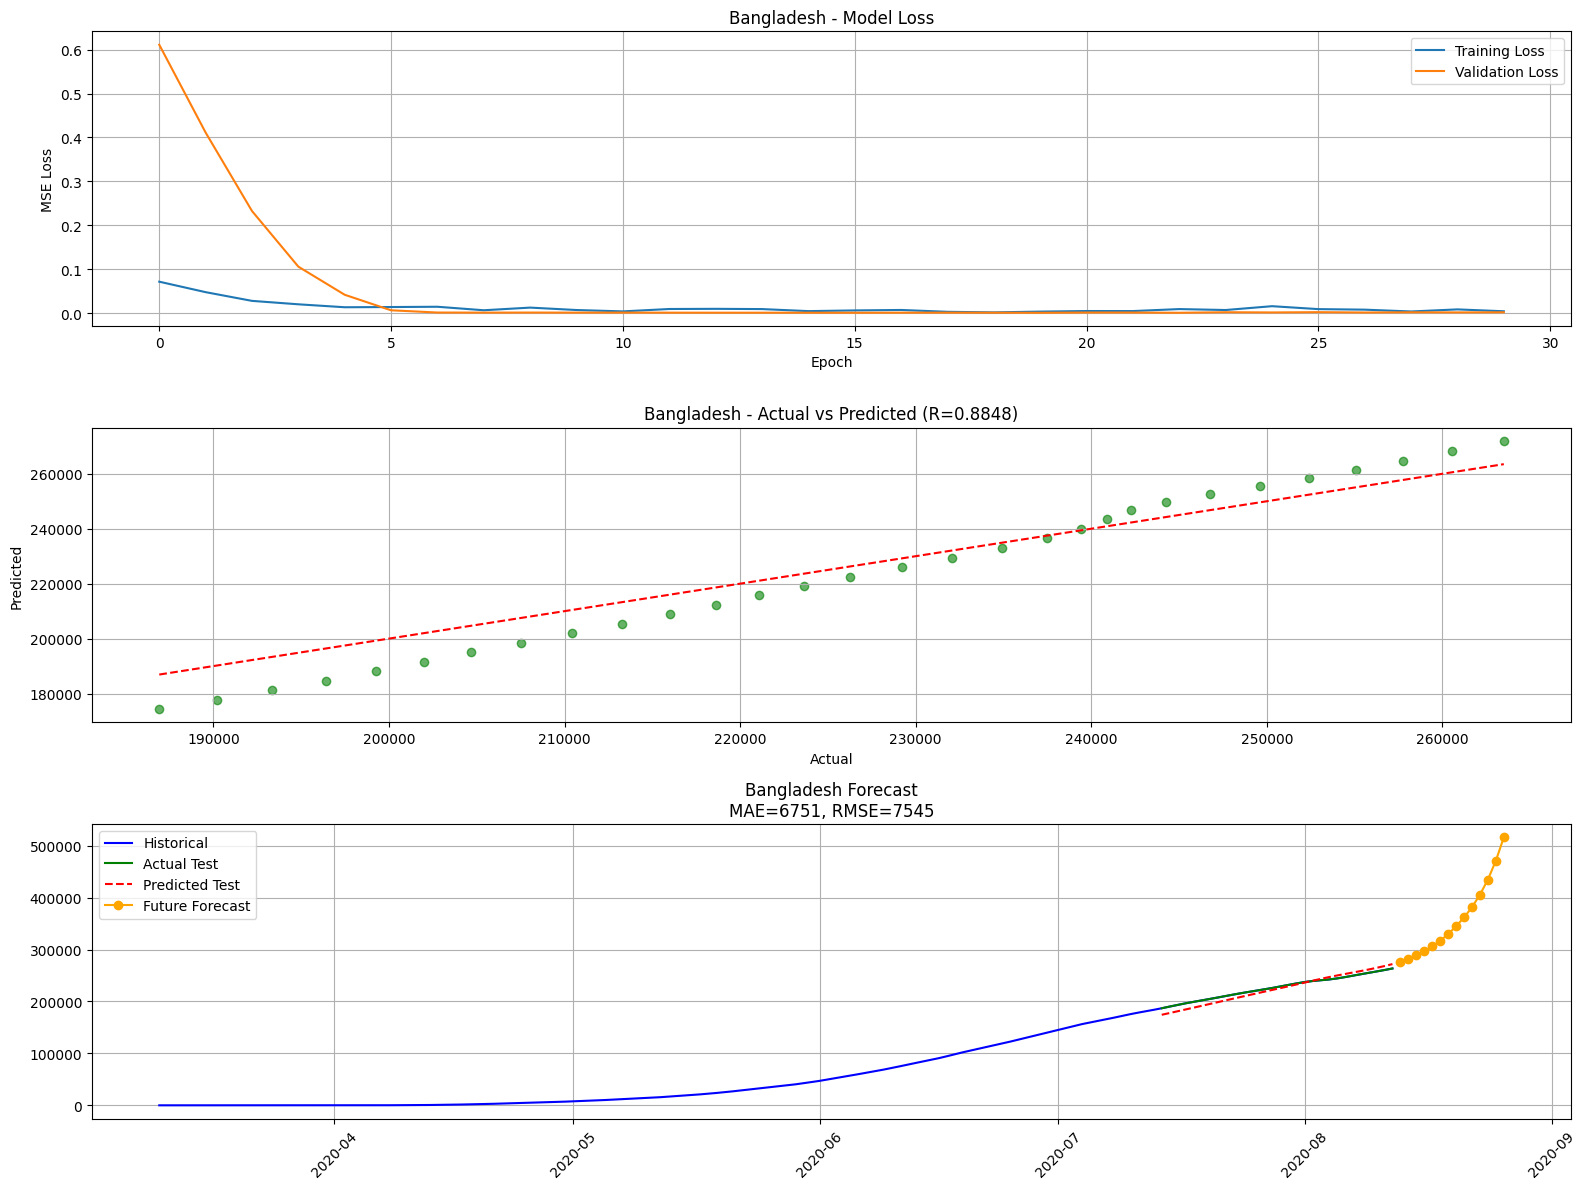


📊 BANGLADESH - LSTM FORECAST SUMMARY
Day  1 (2020-08-13): 275,906 cases
Day  2 (2020-08-14): 281,915 cases
Day  3 (2020-08-15): 288,780 cases
Day  4 (2020-08-16): 296,701 cases
Day  5 (2020-08-17): 305,951 cases
Day  6 (2020-08-18): 316,821 cases
Day  7 (2020-08-19): 329,686 cases
Day  8 (2020-08-20): 345,056 cases
Day  9 (2020-08-21): 361,742 cases
Day 10 (2020-08-22): 381,640 cases
Day 11 (2020-08-23): 405,616 cases
Day 12 (2020-08-24): 434,860 cases
Day 13 (2020-08-25): 471,040 cases
Day 14 (2020-08-26): 516,188 cases

🔬 BANGLADESH - MODEL EVALUATION
MAE  : 6750.62
RMSE : 7545.38
R2   : 0.8848
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0365 - mae: 0.1356 - val_loss: 0.2218 - val_mae: 0.4607
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mae: 0.0840 - val_loss: 0.0586 - val_mae: 0.2356
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mae: 0.0692 - val_loss: 0.0245 - val_mae: 0.1549
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1

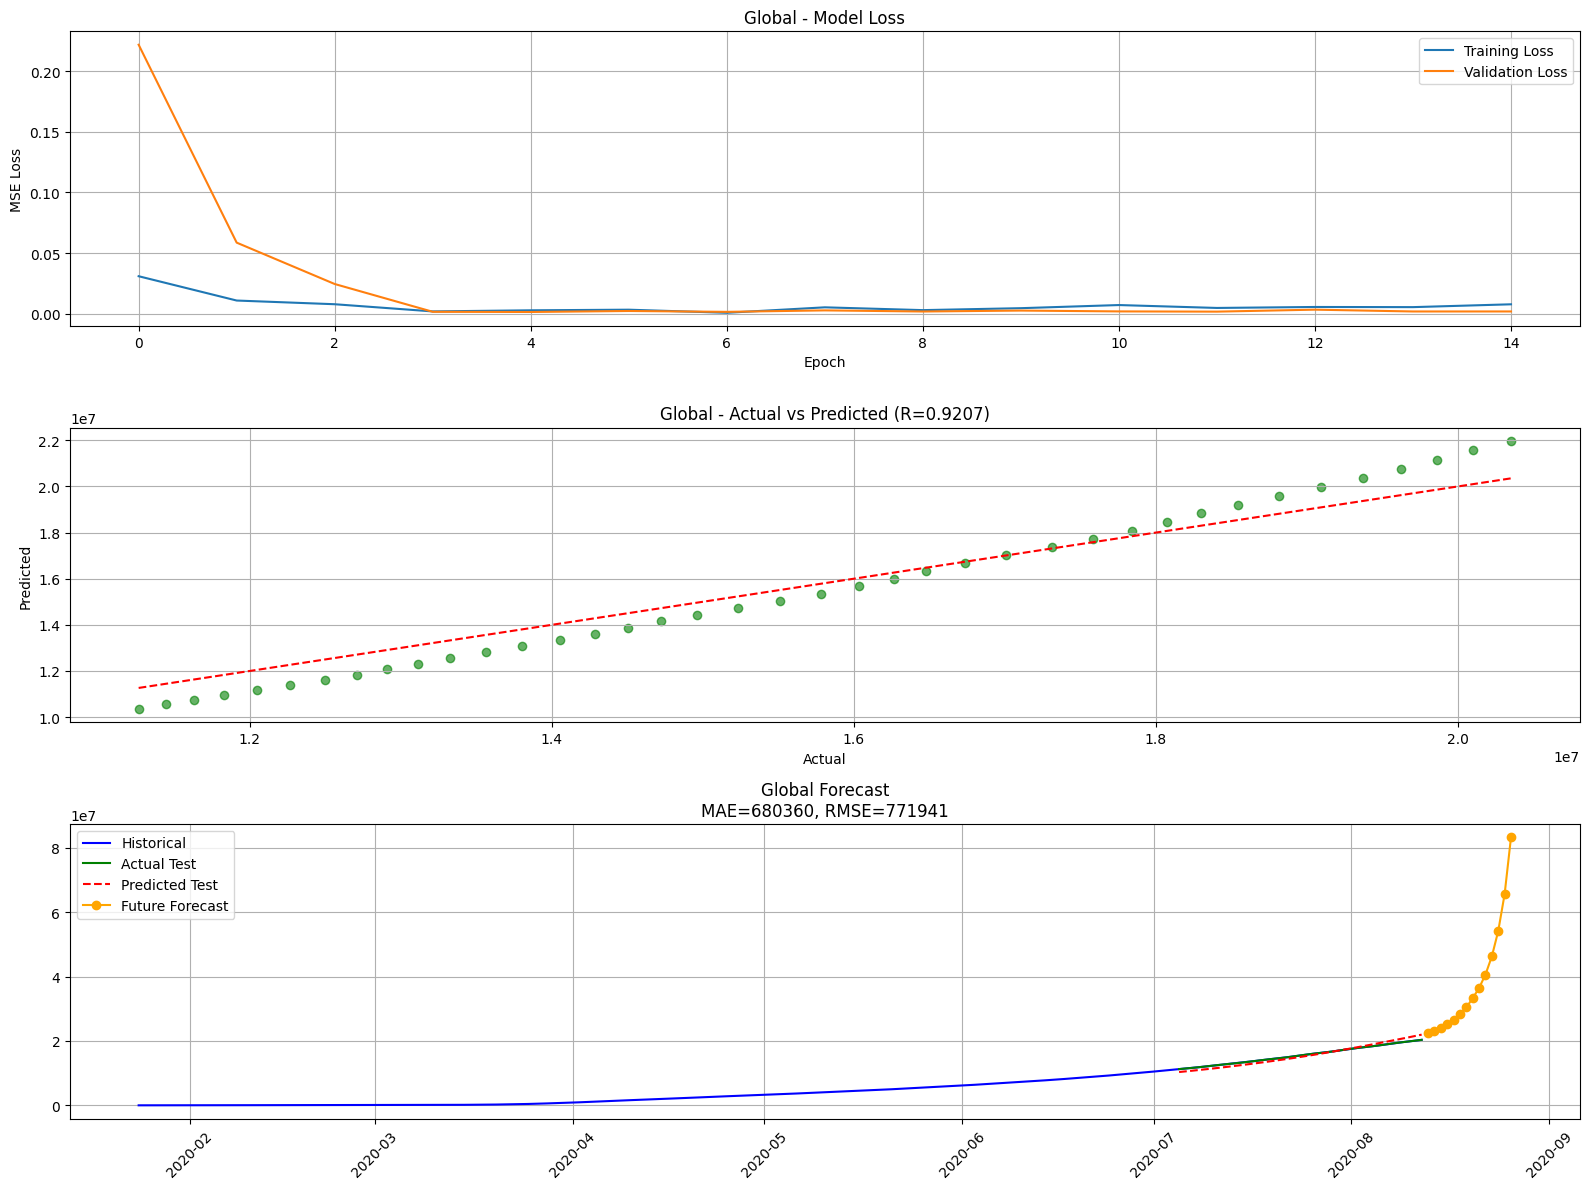


📊 GLOBAL - LSTM FORECAST SUMMARY
Day  1 (2020-08-13): 22,387,992 cases
Day  2 (2020-08-14): 23,138,528 cases
Day  3 (2020-08-15): 24,051,940 cases
Day  4 (2020-08-16): 25,163,718 cases
Day  5 (2020-08-17): 26,537,980 cases
Day  6 (2020-08-18): 28,261,158 cases
Day  7 (2020-08-19): 30,454,272 cases
Day  8 (2020-08-20): 33,292,472 cases
Day  9 (2020-08-21): 36,474,592 cases
Day 10 (2020-08-22): 40,659,856 cases
Day 11 (2020-08-23): 46,303,316 cases
Day 12 (2020-08-24): 54,179,780 cases
Day 13 (2020-08-25): 65,660,692 cases
Day 14 (2020-08-26): 83,327,472 cases

🔬 GLOBAL - MODEL EVALUATION
MAE  : 680359.70
RMSE : 771941.17
R2   : 0.9207


In [19]:
# === LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import os
import random
import tensorflow as tf
import logging

# === RANDOM SEED SETUP ===
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# === LOGGING SETUP ===
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def log_data_info(data, name):
    logger.info(f"\n=== {name} DATA ===")
    logger.info(f"Shape: {data.shape}")
    logger.info(f"Min: {data.min():.2f}, Max: {data.max():.2f}")
    logger.info(f"Mean: {data.mean():.2f}, Std: {data.std():.2f}")
    logger.info(f"First 5: {data[:5].flatten()}")
    logger.info(f"Last 5: {data[-5:].flatten()}")

def create_sequences(data, window_size=7):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

def plot_results(history, y_test_inv, y_pred_inv, test_dates, future_dates, predicted, actual_values, dates, mae, rmse, r2, label):
    plt.figure(figsize=(16, 12))

    plt.subplot(3, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{label} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.6, color='green')
    plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
    plt.title(f'{label} - Actual vs Predicted (R={r2:.4f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(dates, actual_values, label='Historical', color='blue')
    plt.plot(test_dates, y_test_inv, label='Actual Test', color='green')
    plt.plot(test_dates, y_pred_inv, label='Predicted Test', linestyle='--', color='red')
    plt.plot(future_dates, predicted, label='Future Forecast', color='orange', marker='o')
    plt.title(f'{label} Forecast\nMAE={mae:.0f}, RMSE={rmse:.0f}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def run_forecasting(df, country_filter, label):
    df_filtered = df[df['Country'].str.lower() == country_filter.lower()].copy() if country_filter else df.copy()

    daily = df_filtered.groupby('ObservationDate')[['Confirmed']].sum().reset_index()
    daily = daily.sort_values('ObservationDate').reset_index(drop=True)
    daily = daily[daily['Confirmed'] > 0]
    daily['Confirmed'] = daily['Confirmed'].rolling(window=3).mean().dropna()
    daily = daily.dropna().reset_index(drop=True)

    data_values = daily['Confirmed'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data_values)

    window_size = 7
    X, y = create_sequences(data_scaled, window_size)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential([
        Input(shape=(window_size, 1)),
        LSTM(32, activation='relu', dropout=0.1),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test),
                        callbacks=[early_stop], verbose=1)

    y_pred_scaled = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred_scaled)

    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    last_seq = data_scaled[-window_size:].reshape(1, window_size, 1)
    pred_scaled = []
    for _ in range(14):
        pred = model.predict(last_seq, verbose=0)[0, 0]
        pred_scaled.append(pred)
        last_seq = np.append(last_seq[:, 1:, :], [[[pred]]], axis=1)

    pred_scaled = np.array(pred_scaled).reshape(-1, 1)
    predicted = scaler.inverse_transform(pred_scaled)

    dates = daily['ObservationDate'].values
    actual_values = daily['Confirmed'].values
    test_dates = dates[-len(y_test):]
    future_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=14)

    plot_results(history, y_test_inv, y_pred_inv, test_dates, future_dates, predicted, actual_values, dates, mae, rmse, r2, label)

    print(f"\n\U0001F4CA {label.upper()} - LSTM FORECAST SUMMARY")
    print("="*60)
    for i, (date, val) in enumerate(zip(future_dates, predicted.flatten()), 1):
        print(f"Day {i:2d} ({date.date()}): {int(val):,} cases")

    print(f"\n\U0001F52C {label.upper()} - MODEL EVALUATION")
    print("="*60)
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R2   : {r2:.4f}")

# === MAIN EXECUTION ===
try:
    file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()

    # Standardize country/date columns
    for col in ['Country/Region', 'Country_Region', 'Country']:
        if col in df.columns:
            df.rename(columns={col: 'Country'}, inplace=True)
            break
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')

    logger.info("\n\U0001F30E Running for BANGLADESH")
    run_forecasting(df, 'Bangladesh', 'Bangladesh')

    logger.info("\n\U0001F310 Running for GLOBAL")
    run_forecasting(df, None, 'Global')

except Exception as e:
    logger.error(f"\n? Error occurred: {str(e)}")
    print("\n\u274C Error:", str(e))
    print("\u2753 Please check:")
    print("1. Dataset path and filename")
    print("2. Column names like 'Confirmed' or 'Country'")
    print("3. Proper date parsing and non-empty data")





#**CNN MODEL**

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0488 - mae: 0.1473 - val_loss: 0.1694 - val_mae: 0.4093
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0081 - mae: 0.0732 - val_loss: 9.7361e-04 - val_mae: 0.0306
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - mae: 0.0292 - val_loss: 0.0021 - val_mae: 0.0443
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9528e-04 - mae: 0.0133 - val_loss: 2.2502e-04 - val_mae: 0.0124
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8759e-04 - mae: 0.0131 - val_loss: 1.6534e-04 - val_mae: 0.0118
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1004e-04 - mae: 0.0121 - val_loss: 8.9191e-05 - val_mae: 0.0075
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0412e-04 - mae: 0.0080 - val_loss: 1.9866e-04 - val_mae: 0.0123
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4400e-05 - mae: 0.0062 - val_loss: 1.5907e-04 - val_mae: 0.0108
Epoch 9/100
15

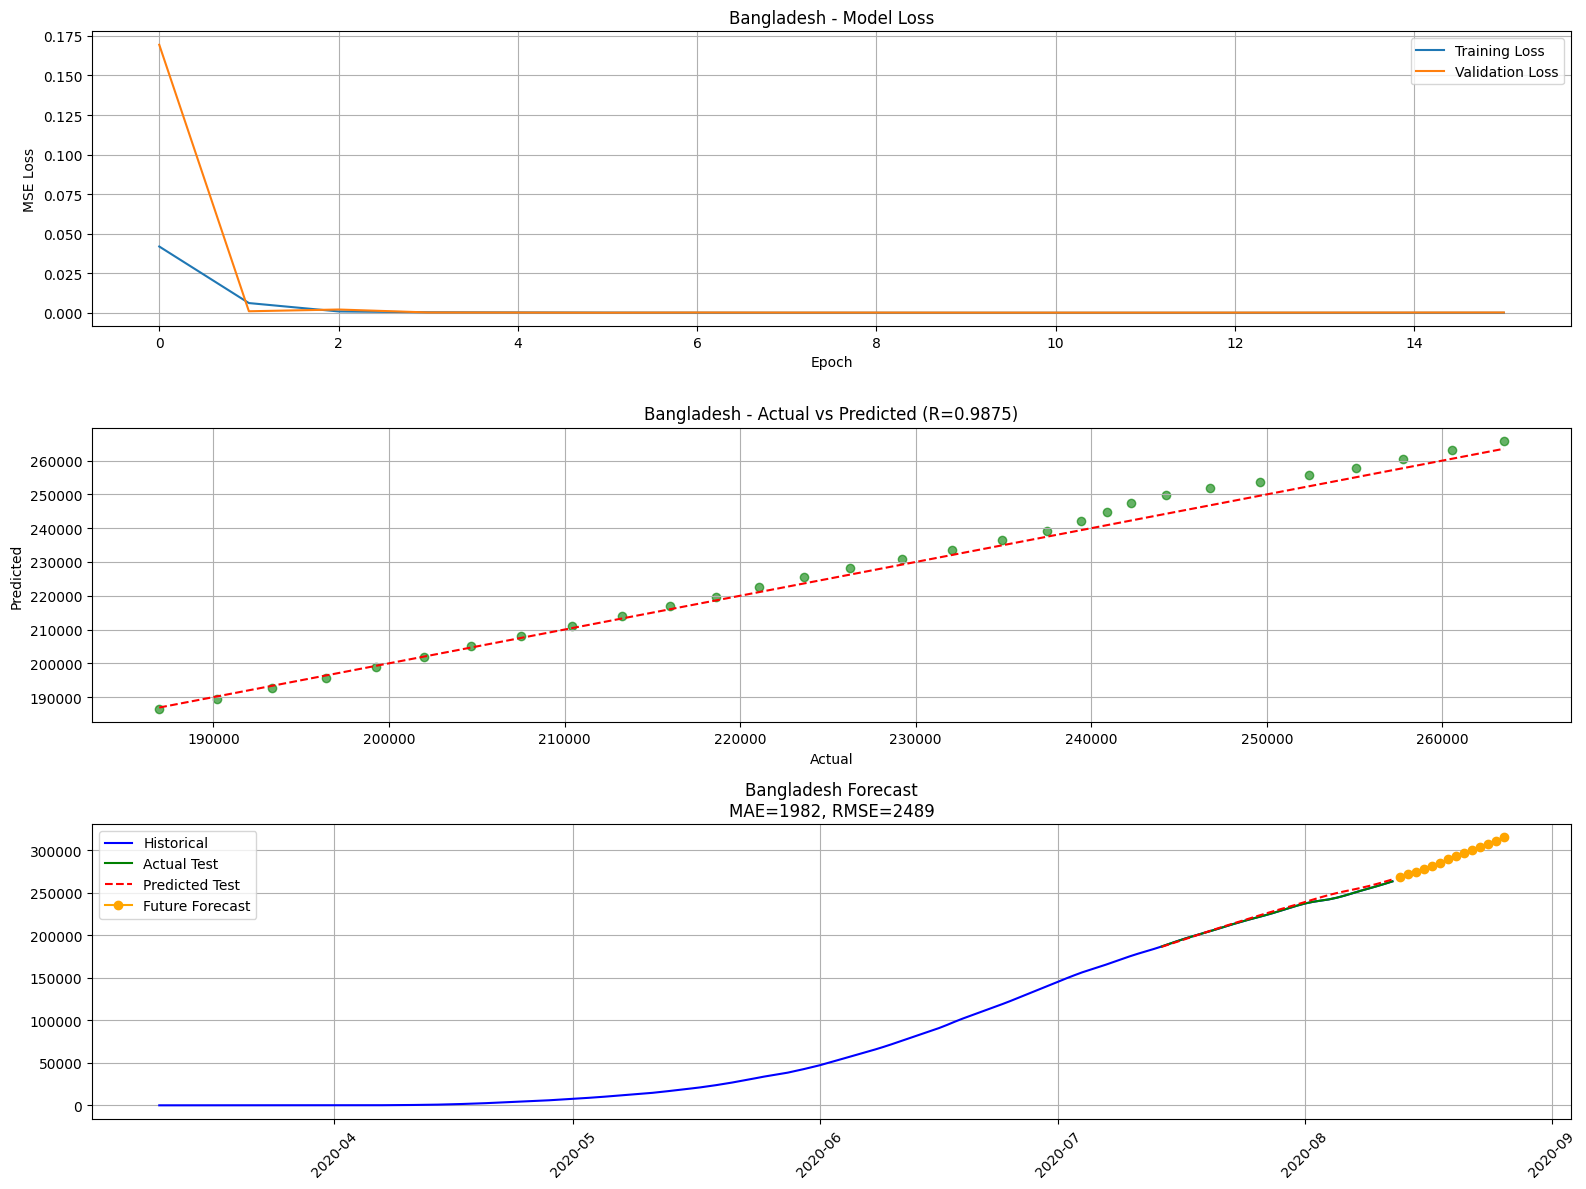


?? BANGLADESH - CNN FORECAST SUMMARY
Day  1 (2020-08-13): 268,620 cases
Day  2 (2020-08-14): 271,696 cases
Day  3 (2020-08-15): 274,887 cases
Day  4 (2020-08-16): 278,423 cases
Day  5 (2020-08-17): 282,039 cases
Day  6 (2020-08-18): 285,696 cases
Day  7 (2020-08-19): 289,282 cases
Day  8 (2020-08-20): 292,960 cases
Day  9 (2020-08-21): 296,606 cases
Day 10 (2020-08-22): 300,302 cases
Day 11 (2020-08-23): 304,043 cases
Day 12 (2020-08-24): 307,803 cases
Day 13 (2020-08-25): 311,590 cases
Day 14 (2020-08-26): 315,401 cases

?? BANGLADESH - MODEL EVALUATION
MAE  : 1982.19
RMSE : 2488.53
R2   : 0.9875
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mae: 0.0748 - val_loss: 0.0011 - val_mae: 0.0331
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6706e-04 - mae: 0.0201 - val_loss: 0.0046 - val_mae: 0.0658
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3405e-04 - mae: 0.0089 - val_loss: 0.0010 - val_mae: 0.0298
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━

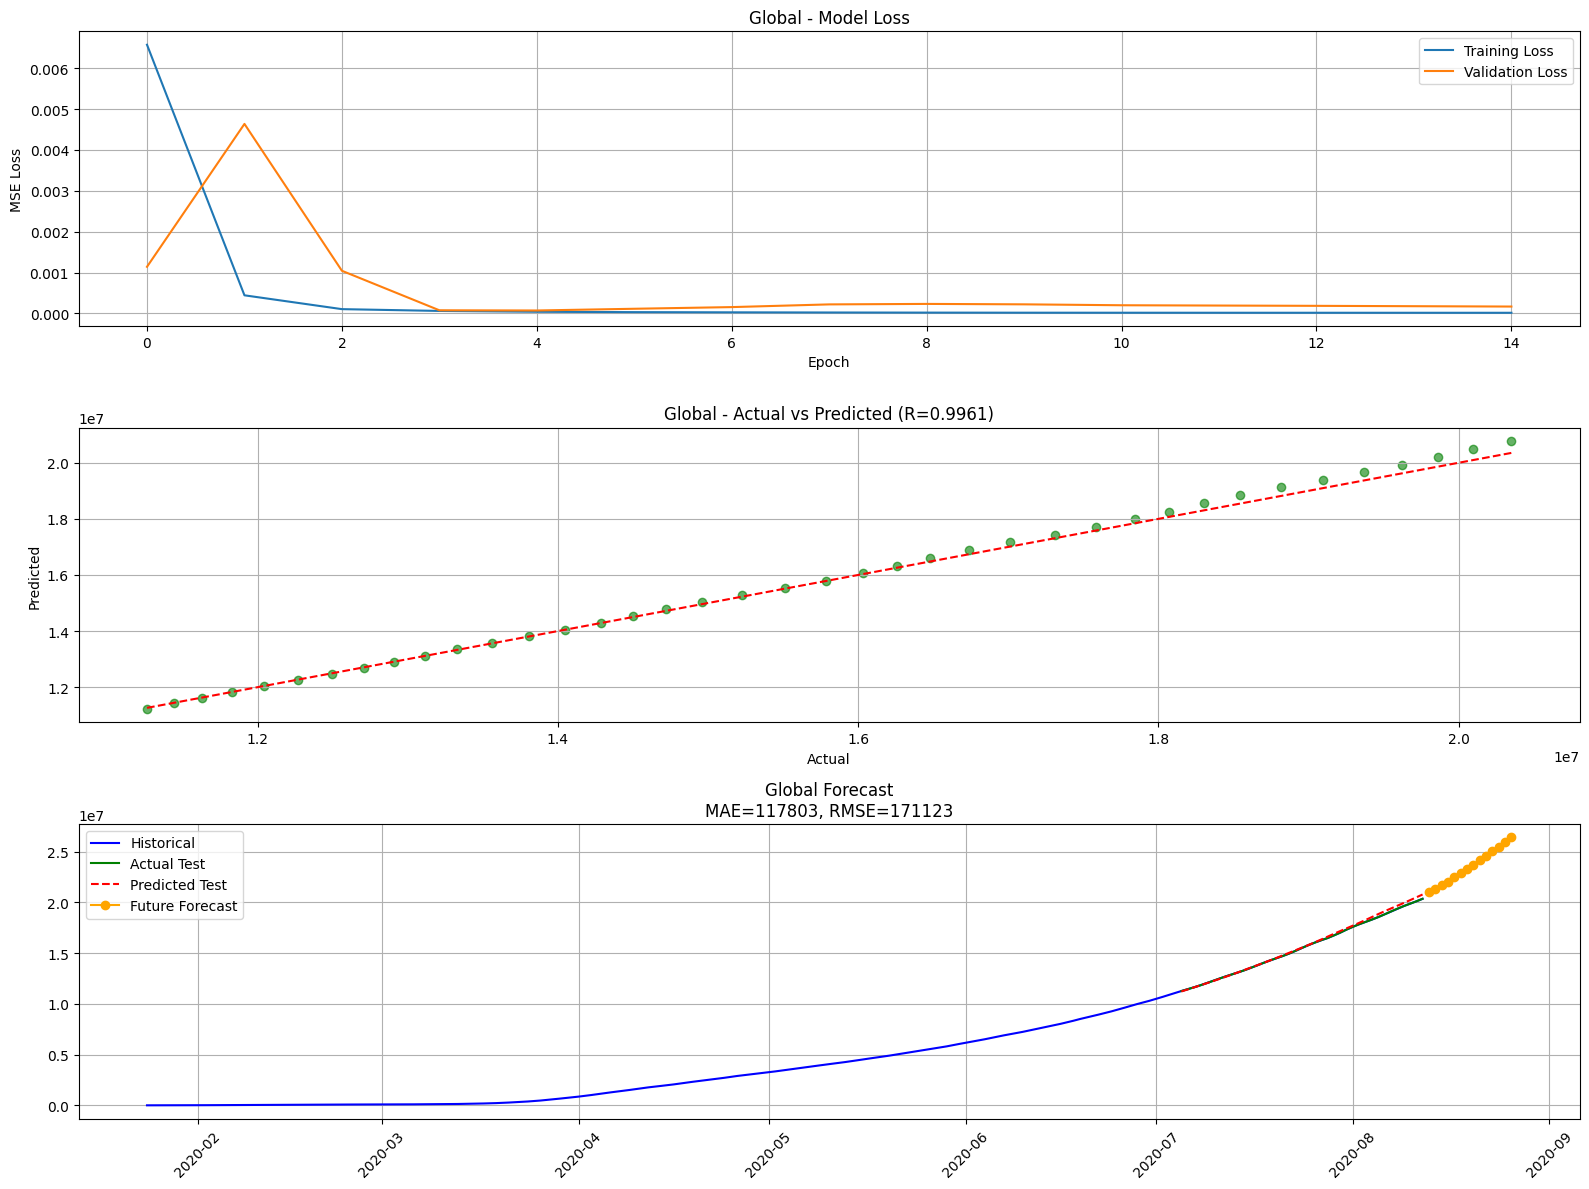


?? GLOBAL - CNN FORECAST SUMMARY
Day  1 (2020-08-13): 21,055,818 cases
Day  2 (2020-08-14): 21,363,374 cases
Day  3 (2020-08-15): 21,700,480 cases
Day  4 (2020-08-16): 22,041,316 cases
Day  5 (2020-08-17): 22,461,244 cases
Day  6 (2020-08-18): 22,866,866 cases
Day  7 (2020-08-19): 23,309,962 cases
Day  8 (2020-08-20): 23,725,708 cases
Day  9 (2020-08-21): 24,141,870 cases
Day 10 (2020-08-22): 24,572,350 cases
Day 11 (2020-08-23): 25,024,074 cases
Day 12 (2020-08-24): 25,481,796 cases
Day 13 (2020-08-25): 25,946,402 cases
Day 14 (2020-08-26): 26,416,606 cases

?? GLOBAL - MODEL EVALUATION
MAE  : 117803.15
RMSE : 171123.48
R2   : 0.9961


In [22]:
# === LIBRARIES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
import os
import random
import tensorflow as tf
import logging

# === RANDOM SEED SETUP ===
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# === LOGGING SETUP ===
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def log_data_info(data, name):
    logger.info(f"\n=== {name} DATA ===")
    logger.info(f"Shape: {data.shape}")
    logger.info(f"Min: {data.min():.2f}, Max: {data.max():.2f}")
    logger.info(f"Mean: {data.mean():.2f}, Std: {data.std():.2f}")
    logger.info(f"First 5: {data[:5].flatten()}")
    logger.info(f"Last 5: {data[-5:].flatten()}")

def create_sequences(data, window_size=7):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

def plot_results(history, y_test_inv, y_pred_inv, test_dates, future_dates, predicted, actual_values, dates, mae, rmse, r2, label):
    plt.figure(figsize=(16, 12))

    plt.subplot(3, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{label} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.scatter(y_test_inv, y_pred_inv, alpha=0.6, color='green')
    plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
    plt.title(f'{label} - Actual vs Predicted (R={r2:.4f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(dates, actual_values, label='Historical', color='blue')
    plt.plot(test_dates, y_test_inv, label='Actual Test', color='green')
    plt.plot(test_dates, y_pred_inv, label='Predicted Test', linestyle='--', color='red')
    plt.plot(future_dates, predicted, label='Future Forecast', color='orange', marker='o')
    plt.title(f'{label} Forecast\nMAE={mae:.0f}, RMSE={rmse:.0f}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def run_forecasting(df, country_filter, label):
    df_filtered = df[df['Country'].str.lower() == country_filter.lower()].copy() if country_filter else df.copy()

    daily = df_filtered.groupby('ObservationDate')[['Confirmed']].sum().reset_index()
    daily = daily.sort_values('ObservationDate').reset_index(drop=True)
    daily = daily[daily['Confirmed'] > 0]
    daily['Confirmed'] = daily['Confirmed'].rolling(window=3).mean().dropna()
    daily = daily.dropna().reset_index(drop=True)

    data_values = daily['Confirmed'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data_values)

    window_size = 7
    X, y = create_sequences(data_scaled, window_size)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential([
        Input(shape=(window_size, 1)),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test),
                        callbacks=[early_stop], verbose=1)

    y_pred_scaled = model.predict(X_test)
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred_scaled)

    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)

    last_seq = data_scaled[-window_size:].reshape(1, window_size, 1)
    pred_scaled = []
    for _ in range(14):
        pred = model.predict(last_seq, verbose=0)[0, 0]
        pred_scaled.append(pred)
        last_seq = np.append(last_seq[:, 1:, :], [[[pred]]], axis=1)

    pred_scaled = np.array(pred_scaled).reshape(-1, 1)
    predicted = scaler.inverse_transform(pred_scaled)

    dates = daily['ObservationDate'].values
    actual_values = daily['Confirmed'].values
    test_dates = dates[-len(y_test):]
    future_dates = pd.date_range(start=dates[-1] + pd.Timedelta(days=1), periods=14)

    plot_results(history, y_test_inv, y_pred_inv, test_dates, future_dates, predicted, actual_values, dates, mae, rmse, r2, label)

    print(f"\n?? {label.upper()} - CNN FORECAST SUMMARY")
    print("="*60)
    for i, (date, val) in enumerate(zip(future_dates, predicted.flatten()), 1):
        print(f"Day {i:2d} ({date.date()}): {int(val):,} cases")

    print(f"\n?? {label.upper()} - MODEL EVALUATION")
    print("="*60)
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R2   : {r2:.4f}")

# === MAIN EXECUTION ===
try:
    file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()

    # Standardize country/date columns
    for col in ['Country/Region', 'Country_Region', 'Country']:
        if col in df.columns:
            df.rename(columns={col: 'Country'}, inplace=True)
            break
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')

    logger.info("\n?? Running for BANGLADESH")
    run_forecasting(df, 'Bangladesh', 'Bangladesh')

    logger.info("\n?? Running for GLOBAL")
    run_forecasting(df, None, 'Global')

except Exception as e:
    logger.error(f"\n? Error occurred: {str(e)}")
    print("\n? Error:", str(e))
    print("? Please check:")
    print("1. Dataset path and filename")
    print("2. Column names like 'Confirmed' or 'Country'")
    print("3. Proper date parsing and non-empty data")






# **Chapter 6: Conclusion :**

# **All World Covid 19-**

The COVID-19 pandemic, which emerged in late 2019, has had profound and lasting effects on global health, economies, and societies. With millions of infections and deaths recorded worldwide, the virus challenged healthcare systems, exposed vulnerabilities in public health infrastructure, and led to unprecedented lockdowns and restrictions.

Governments and scientific communities responded with rapid vaccine development, public health measures, and economic support programs. The global vaccination campaign played a crucial role in reducing severe cases and deaths, though challenges such as vaccine distribution disparities and new variants remained persistent threats.

Beyond health implications, COVID-19 reshaped the global economy, leading to supply chain disruptions, job losses, and a shift toward remote work and digitalization. Social behaviors, travel patterns, and educational systems also underwent significant transformations, many of which continue to influence the post-pandemic world.

 While the acute phase of the pandemic has subsided, ongoing vigilance, improved healthcare preparedness, and international cooperation remain essential to mitigate future pandemics. The lessons learned from COVID-19 emphasize the importance of scientific research, early intervention, and global solidarity in addressing public health crises.

# **Bangladesh Covid 19 -**

The COVID-19 pandemic had a significant impact on Bangladesh, affecting public health, the economy, and daily life. Since the first reported case in March 2020, the country experienced multiple waves of infection, with hospitals facing critical challenges due to limited healthcare infrastructure. Despite these difficulties, Bangladesh took decisive measures, including lockdowns, mask mandates, and social distancing policies, to control the virus's spread.

 The nationwide vaccination campaign played a crucial role in reducing severe cases and mortality rates. The government, in collaboration with international organizations, ensured mass vaccination, prioritizing frontline workers and vulnerable populations. However, challenges such as vaccine hesitancy, misinformation, and logistical issues initially slowed progress.

 Economically, the pandemic caused disruptions in industries such as garments, transportation, and tourism. Millions of people, especially in the informal sector, lost their jobs, increasing poverty and food insecurity. The government and NGOs provided stimulus packages and relief programs to support affected communities.

 Despite the hardships, Bangladesh demonstrated resilience, with the economy rebounding as restrictions eased. The pandemic also accelerated digital transformation, with remote work, online education, and e-commerce gaining traction. Moving forward, continued investment in healthcare, pandemic preparedness, and economic recovery will be essential for long-term resilience against future public health crises.

# **Thank You!**